# Ucitavanje potrebnih biblioteka

In [1]:
from Bio import SeqIO
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
from itertools import product

2024-01-26 22:58:33.611915: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 22:58:33.847592: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 22:58:33.848594: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-26 22:58:34.926244: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Generisanje varijacija radi imenovanja kolona u tabeli

In [2]:
slova = ['A', 'C', 'T', 'G']

broj_pozicija = 3

varijacije = list(product(slova, repeat=broj_pozicija))

niske_varijacije = [''.join(varijacija) for varijacija in varijacije]

# Priprema tabela sa podacima

In [3]:
def brojanje_tripleta(niska, niske_varijacije,start):
    duzina=len(niska)
    mapa_tripleta = {var: 0 for var in niske_varijacije}
        
    for i in range(start, len(niska) - 2, 3):
        triplet = niska[i:i+3]
        if triplet in niske_varijacije:
            mapa_tripleta[triplet] += 1
    for key,value in mapa_tripleta.items():
        mapa_tripleta[key]=mapa_tripleta[key]/duzina
    
    return mapa_tripleta

In [4]:
def generisanje_tabele_rezultata(putanja1,virus,start):
    postojeci_df = pd.DataFrame()

    ids=[]
    proteins=[]
    for seq_record in SeqIO.parse(putanja1, "fasta"):
        ulazna_niska = str(seq_record.seq)  # Konvertujemo u string
        ids.append(seq_record.id)
        rezultat = re.search(r'\|([^[]+)', seq_record.description)
        proteins.append(rezultat.group(1).strip())
        
        nova_mapa = brojanje_tripleta(ulazna_niska, niske_varijacije,start)

        novi_red = pd.DataFrame([nova_mapa], columns=niske_varijacije).fillna(0)
        postojeci_df = pd.concat([postojeci_df, novi_red], ignore_index=True)
        

    postojeci_df.insert(0, 'Virus', virus)
    postojeci_df.insert(1,"ID",ids)
    postojeci_df.insert(2,"Protein",proteins)


    return postojeci_df

In [5]:
def update_proteins_bcov(data_frame):
    # Prvo ažuriranje
    data_frame.loc[data_frame['Protein'] == 'Orf1ab protein', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'orf1ab polyprotein', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'polyprotein orf1ab', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'ORF1ab', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'polyprotein 1ab', 'Protein'] = 'ORF1ab polyprotein'

    # Drugo ažuriranje
    data_frame.loc[data_frame['Protein'] == 'Orf1a protein', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'replicase', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'RNA polymerase 1a', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'orf1a polyprotein', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'replicase polyprotein 1a', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'polyprotein orf1a', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'polyprotein 1a', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'ORF1a', 'Protein'] = 'ORF1a polyprotein'

    # Treće ažuriranje
    data_frame.loc[data_frame['Protein'] == 'RNA polymerase 1b', 'Protein'] = 'ORF1b polyprotein'
    data_frame.loc[data_frame['Protein'] == 'replicase polyprotein 1ab', 'Protein'] = 'ORF1b polyprotein'
    data_frame.loc[data_frame['Protein'] == 'RNA dependent RNA polymerase', 'Protein'] = 'ORF1b polyprotein'

    # Četvrto ažuriranje
    data_frame.loc[data_frame['Protein'] == 'spike protein', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'spike glycoprotein', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'spike protein precursor', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'spike structural protein', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'S', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'S protein', 'Protein'] = 'surface glycoprotein'

    # Peto ažuriranje
    data_frame.loc[data_frame['Protein'] == 'nucleocapsid protein', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'nucleocaspid protein', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'nucleoprotein', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'N', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'N protein', 'Protein'] = 'nucleocapsid phosphoprotein'
    
    # Prvo azuriranje
    data_frame.loc[data_frame['Protein'] == 'hemagglutinin-esterase', 'Protein'] = 'hemagglutinin-esterase glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'hemmaglutinin-esterase', 'Protein'] = 'hemagglutinin-esterase glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'hemagglutinn-esterase', 'Protein'] = 'hemagglutinin-esterase glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'hemagglutinin esterase', 'Protein'] = 'hemagglutinin-esterase glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'HE', 'Protein'] = 'hemagglutinin-esterase glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'hemagglutinin-esterase precursor', 'Protein'] = 'hemagglutinin-esterase glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'hemagglutinin-esterase protein', 'Protein'] = 'hemagglutinin-esterase glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'HE protein', 'Protein'] = 'hemagglutinin-esterase glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'hemagglutinin-esterase envelope glycoprotein', 'Protein'] = 'hemagglutinin-esterase glycoprotein'

    # Drugo ažuriranje
    data_frame.loc[data_frame['Protein'] == '32 kDa protein', 'Protein'] = '32 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == '32 kD non-structural protein', 'Protein'] = '32 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == 'nonstructural protein 2a', 'Protein'] = '32 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == '32KDa protein product', 'Protein'] = '32 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == '32 kDa protein product', 'Protein'] = '32 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'].str.startswith('NS2'), 'Protein'] = '32 kDa non-structural protein'

    # Treće ažuriranje
    data_frame.loc[data_frame['Protein'] == 'membrane protein', 'Protein'] = 'membrane glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'M protein', 'Protein'] = 'membrane glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'multispanning envelope protein', 'Protein'] = 'membrane glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'membrane multispanning envelope protein', 'Protein'] = 'membrane glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'M', 'Protein'] = 'membrane glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'matrix protein', 'Protein'] = 'membrane glycoprotein'

    # Četvrto ažuriranje
    data_frame.loc[data_frame['Protein'] == '12.7 kDa protein', 'Protein'] = '12.7 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == '12.7 kD non-structural protein', 'Protein'] = '12.7 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == '12.7 kDa non structural protein', 'Protein'] = '12.7 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == '12.7 kDa nonstructural protein', 'Protein'] = '12.7 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'].str.startswith('NS12'), 'Protein'] = '12.7 kDa non-structural protein'

    # Peto ažuriranje
    data_frame.loc[data_frame['Protein'] == 'small envelope protein', 'Protein'] = 'envelope protein'
    data_frame.loc[data_frame['Protein'] == 'small envelpoe protein', 'Protein'] = 'envelope protein'
    data_frame.loc[data_frame['Protein'].str.contains('small membrane protein'), 'Protein'] = 'envelope protein'
    data_frame.loc[data_frame['Protein'] == 'E', 'Protein'] = 'envelope protein'
    data_frame.loc[data_frame['Protein'] == 'E protein', 'Protein'] = 'envelope protein'

    # Šesto ažuriranje
    data_frame.loc[data_frame['Protein'] == '4.9 kDa protein', 'Protein'] = '4.9 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == '4.9 kD non-structural protein', 'Protein'] = '4.9 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == '4.9 kDa nonstructural protein', 'Protein'] = '4.9 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == '4.9 kDa non structural protein', 'Protein'] = '4.9 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'].str.startswith('NS4.9'), 'Protein'] = '4.9 kDa non-structural protein'

    # Sedmo ažuriranje
    data_frame.loc[data_frame['Protein'] == '4.8 kDa protein', 'Protein'] = '4.8 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == '4.8 kDA protein', 'Protein'] = '4.8 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == 'NS4.8', 'Protein'] = '4.8 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == '4.8 kD non-structural protein', 'Protein'] = '4.8 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == '4.8 kDa nonstructural protein', 'Protein'] = '4.8 kDa non-structural protein'
    data_frame.loc[data_frame['Protein'] == '4.8 kDa non structural protein', 'Protein'] = '4.8 kDa non-structural protein'



In [6]:
import pandas as pd

def update_proteins_sars(data_frame):
    # Prvo ažuriranje
    data_frame.loc[data_frame['Protein'] == 'polyprotein orf1ab', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'replicase 1AB', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'polyprotein orf1a', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'orf1a polyprotein (pp1a)', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'spike glycoprotein', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'spike glycoprotein precursor', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'E2 glycoprotein precursor', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'nucleocapsid protein', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'Orf3', 'Protein'] = 'ORF3a protein'
    data_frame.loc[data_frame['Protein'] == 'hypothetical protein sars3a', 'Protein'] = 'ORF3a protein'

    # Drugo ažuriranje
    data_frame.loc[data_frame['Protein'] == 'membrane protein', 'Protein'] = 'membrane glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'membrane glycoprotein M', 'Protein'] = 'membrane glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'matrix protein', 'Protein'] = 'membrane glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'hypothetical protein sars7a', 'Protein'] = 'ORF7a protein'

    # Treće ažuriranje
    data_frame.loc[data_frame['Protein'] == 'protein E', 'Protein'] = 'envelope protein'
    data_frame.loc[data_frame['Protein'] == 'small envelope protein', 'Protein'] = 'envelope protein'
    data_frame.loc[data_frame['Protein'] == 'small envelope E protein', 'Protein'] = 'envelope protein'

    # Četvrto ažuriranje
    data_frame.loc[data_frame['Protein'] == 'hypothetical protein sars8b', 'Protein'] = 'ORF8 protein'
    data_frame.loc[data_frame['Protein'] == 'ORF8b protein', 'Protein'] = 'ORF8 protein'

    # Peto ažuriranje
    data_frame.loc[data_frame['Protein'] == 'hypothetical protein sars6', 'Protein'] = 'ORF6 protein'

    # Šesto ažuriranje
    data_frame.loc[data_frame['Protein'] == 'Orf10', 'Protein'] = 'ORF10 protein'

    # Sedmo ažuriranje
    data_frame.loc[data_frame['Protein'] == 'hypothetical protein sars7b', 'Protein'] = 'ORF7b protein'
    data_frame.loc[data_frame['Protein'] == 'non-structural protein NS7b', 'Protein'] = 'ORF7b protein'



In [7]:
def update_proteins_mers(data_frame):
    # Ažuriranje za ORF1a polyprotein
    data_frame.loc[data_frame['Protein'] == 'ORF1a', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'ORF1A polyprotein', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == '1A polyprotein', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'ORF 1a', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'ORF1a protein', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'orf1a', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'orf1a protein', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'polyprotein ORF1a', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'polyprotein 1a', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'polyprotein orf1a', 'Protein'] = 'ORF1a polyprotein'

    # Ažuriranje za ORF1ab polyprotein
    data_frame.loc[data_frame['Protein'] == 'ORF1ab', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'polyprotein 1ab', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == '1AB polyprotein', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'ORF1AB polyprotein', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'ORF1ab protein', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'orf1ab', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'orf1ab protein', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'orf1b protein', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'polyprotein ORF1ab', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'polyprotein orf1ab', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'ORF 1ab', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'replicase polyprotein', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'ORF1ab polyprotein', 'Protein'] = 'ORF1ab polyprotein'

    # Ažuriranje za ORF1b polyprotein
    data_frame.loc[data_frame['Protein'] == 'ORF1b', 'Protein'] = 'ORF1b polyprotein'
    data_frame.loc[data_frame['Protein'] == 'orf1b', 'Protein'] = 'ORF1b polyprotein'

    # Ažuriranje za surface glycoprotein
    data_frame.loc[data_frame['Protein'] == 'spike protein', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'S protein', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'S', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'spike glycoprotein', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'spike', 'Protein'] = 'surface glycoprotein'

    # Ažuriranje za nucleocapsid phosphoprotein
    data_frame.loc[data_frame['Protein'] == 'nucleocapsid protein', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'N protein', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'N', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'nucleoprotein', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'nucleocapsid', 'Protein'] = 'nucleocapsid phosphoprotein'
    
    
    data_frame.loc[data_frame['Protein'] == 'ORF5', 'Protein'] = 'ORF5 protein'
    data_frame.loc[data_frame['Protein'] == 'orf5', 'Protein'] = 'ORF5 protein'
    data_frame.loc[data_frame['Protein'] == 'orf5 protein', 'Protein'] = 'ORF5 protein'
    data_frame.loc[data_frame['Protein'] == 'NS3D protein', 'Protein'] = 'ORF5 protein'
    data_frame.loc[data_frame['Protein'] == 'NS3d protein', 'Protein'] = 'ORF5 protein'
    data_frame.loc[data_frame['Protein'] == 'NS5 protein', 'Protein'] = 'ORF5 protein'
    data_frame.loc[data_frame['Protein'] == 'ORF 5', 'Protein'] = 'ORF5 protein'

    data_frame.loc[data_frame['Protein'] == 'non-structural protein 5', 'Protein'] = 'ORF4b protein'

    # Ažuriranje za ORF4b protein
    data_frame.loc[data_frame['Protein'] == 'orf4b', 'Protein'] = 'ORF4b protein'
    data_frame.loc[data_frame['Protein'] == 'ORF4b', 'Protein'] = 'ORF4b protein'
    data_frame.loc[data_frame['Protein'] == 'orf4b protein', 'Protein'] = 'ORF4b protein'
    data_frame.loc[data_frame['Protein'] == 'NS3C protein', 'Protein'] = 'ORF4b protein'
    data_frame.loc[data_frame['Protein'] == 'NS3c protein', 'Protein'] = 'ORF4b protein'
    data_frame.loc[data_frame['Protein'] == 'NS4B protein', 'Protein'] = 'ORF4b protein'
    data_frame.loc[data_frame['Protein'] == 'NS4b protein', 'Protein'] = 'ORF4b protein'
    data_frame.loc[data_frame['Protein'] == 'ORF 4b', 'Protein'] = 'ORF4b protein'
    data_frame.loc[data_frame['Protein'] == 'ORF4b protein', 'Protein'] = 'ORF4b protein'
    data_frame.loc[data_frame['Protein'] == 'non-structural protein 4b', 'Protein'] = 'ORF4b protein'

    # Ažuriranje za envelope protein
    data_frame.loc[data_frame['Protein'] == 'E', 'Protein'] = 'envelope protein'
    data_frame.loc[data_frame['Protein'] == 'E protein', 'Protein'] = 'envelope protein'
    data_frame.loc[data_frame['Protein'] == 'envelope', 'Protein'] = 'envelope protein'

    # Ažuriranje za membrane glycoprotein
    data_frame.loc[data_frame['Protein'] == 'membrane protein', 'Protein'] = 'membrane glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'M', 'Protein'] = 'membrane glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'M protein', 'Protein'] = 'membrane glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'M protein|', 'Protein'] = 'membrane glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'membrane', 'Protein'] = 'membrane glycoprotein'

    # Ažuriranje za ORF3 protein
    data_frame.loc[data_frame['Protein'] == 'ORF3', 'Protein'] = 'ORF3 protein'
    data_frame.loc[data_frame['Protein'] == 'orf3', 'Protein'] = 'ORF3 protein'
    data_frame.loc[data_frame['Protein'] == 'orf3 protein', 'Protein'] = 'ORF3 protein'
    data_frame.loc[data_frame['Protein'] == 'NS3 protein', 'Protein'] = 'ORF3 protein'
    data_frame.loc[data_frame['Protein'] == 'NS3a protein', 'Protein'] = 'ORF3 protein'
    data_frame.loc[data_frame['Protein'] == 'ORF 3', 'Protein'] = 'ORF3 protein'
    data_frame.loc[data_frame['Protein'] == 'NS3A protein', 'Protein'] = 'ORF3 protein'
    data_frame.loc[data_frame['Protein'] == 'non-structural protein 3a', 'Protein'] = 'ORF3 protein'
    # Ažuriranje za ORF8b protein
    data_frame.loc[data_frame['Protein'] == 'ORF8b', 'Protein'] = 'ORF8b protein'
    data_frame.loc[data_frame['Protein'] == 'ORF 8b', 'Protein'] = 'ORF8b protein'
    data_frame.loc[data_frame['Protein'] == 'orf8b', 'Protein'] = 'ORF8b protein'
    data_frame.loc[data_frame['Protein'] == 'orf8b protein', 'Protein'] = 'ORF8b protein'

    # Ažuriranje za ORF4a protein
    data_frame.loc[data_frame['Protein'] == 'orf4a', 'Protein'] = 'ORF4a protein'
    data_frame.loc[data_frame['Protein'] == 'ORF4a', 'Protein'] = 'ORF4a protein'
    data_frame.loc[data_frame['Protein'] == 'ORF 4a', 'Protein'] = 'ORF4a protein'
    data_frame.loc[data_frame['Protein'] == 'NS3b protein', 'Protein'] = 'ORF4a protein'
    data_frame.loc[data_frame['Protein'] == 'NS3B protein', 'Protein'] = 'ORF4a protein'




In [8]:
def update_hcov_229e_proteins(data_frame):
    # Ažuriranje za ORF1a polyprotein
    data_frame.loc[data_frame['Protein'] == 'ORF1a', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'ORF1a protein', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'orf 1a', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'orf1a protein', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'polyprotein ORF1a', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'replicase polyprotein 1a', 'Protein'] = 'ORF1a polyprotein'
    data_frame.loc[data_frame['Protein'] == 'replicase protein 1a', 'Protein'] = 'ORF1a polyprotein'

    # Ažuriranje za surface glycoprotein
    data_frame.loc[data_frame['Protein'] == 'S protein', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'spike protein', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'spike glycoprotein', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'spike surface glycoprotein', 'Protein'] = 'surface glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'S', 'Protein'] = 'surface glycoprotein'

    # Ažuriranje za nucleocapsid phosphoprotein
    data_frame.loc[data_frame['Protein'] == 'N protein', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'nucleocapsid protein', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'nucleoprotein', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'N', 'Protein'] = 'nucleocapsid phosphoprotein'

    # Ažuriranje za membrane glycoprotein
    data_frame.loc[data_frame['Protein'] == 'M protein', 'Protein'] = 'membrane glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'M', 'Protein'] = 'membrane glycoprotein'
    data_frame.loc[data_frame['Protein'] == 'membrane protein', 'Protein'] = 'membrane glycoprotein'

    # Ažuriranje za envelope protein
    data_frame.loc[data_frame['Protein'] == 'E protein', 'Protein'] = 'envelope protein'
    data_frame.loc[data_frame['Protein'] == 'E', 'Protein'] = 'envelope protein'
    data_frame.loc[data_frame['Protein'] == 'envelope small membrane protein', 'Protein'] = 'envelope protein'

    # Ažuriranje za ORF4 protein
    data_frame.loc[data_frame['Protein'] == 'orf4', 'Protein'] = 'ORF4 protein'
    data_frame.loc[data_frame['Protein'] == 'ORF4', 'Protein'] = 'ORF4 protein'
    data_frame.loc[data_frame['Protein'] == '4a', 'Protein'] = 'ORF4 protein'
    data_frame.loc[data_frame['Protein'] == 'non-structural protein 3', 'Protein'] = 'ORF4 protein'
    data_frame.loc[data_frame['Protein'] == 'accessory protein', 'Protein'] = 'ORF4 protein'

    # Ažuriranje za ORF1ab polyprotein
    data_frame.loc[data_frame['Protein'] == 'replicase polyprotein 1ab', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'ORF1ab', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'ORF1AB', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'ORF1ab protein', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'orf 1ab', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'orf1ab protein', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'orf1ab polyprotein', 'Protein'] = 'ORF1ab polyprotein'
    data_frame.loc[data_frame['Protein'] == 'polyprotein ORF1ab', 'Protein'] = 'ORF1ab polyprotein'

In [9]:
def update_oc43_proteins(data_frame):
    data_frame.loc[data_frame['Protein'] == 'nucleocapsid protein', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'nucleoprotein', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'N protein', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'N', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'I', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'unknown', 'Protein'] = 'nucleocapsid phosphoprotein'
    data_frame.loc[data_frame['Protein'] == 'protein I', 'Protein'] = 'nucleocapsid phosphoprotein'

    data_frame.loc[data_frame['Protein'].isin(['hemagglutinin-esterase', 'hemagglutinin-neuraminidase', 'hemagglutinin esterase', 'hemagglutinin-esterase protein', 'HE', 'HE protein']), 'Protein'] = 'hemagglutinin-esterase glycoprotein'

    # Ažuriranje za surface glycoprotein
    data_frame.loc[data_frame['Protein'].isin(['spike glycoprotein', 'spike surface glycoprotein', 'spike protein', 'S', 'S protein', 'S glycoprotein']), 'Protein'] = 'surface glycoprotein'

    # Ažuriranje za ORF1ab polyprotein
    data_frame.loc[data_frame['Protein'].isin(['replicase polyprotein 1ab', 'replicase polyprotein', 'orf1ab polyprotein', 'polyprotein', 'Pp1ab', 'orf 1ab', 'Orf1ab']), 'Protein'] = 'ORF1ab polyprotein'

    # Ažuriranje za ORF1a polyprotein
    data_frame.loc[data_frame['Protein'].isin(['replicase polyprotein 1a', 'orf1a protein', 'Pp1a', 'orf 1a', 'orf1a polyprotein', 'ORF1a protein']), 'Protein'] = 'ORF1a polyprotein'

    # Ažuriranje za envelope protein
    data_frame.loc[data_frame['Protein'].isin(['E protein', 'E', 'NS3', 'NS3 protein', 'envelope small membrane protein']), 'Protein'] = 'envelope protein'

# Ucitavanje i obrada podataka


# MERS

In [10]:
tabela1=generisanje_tabele_rezultata("./MERS/coding_region.fasta","MERS",0)

In [11]:
jedinstvene_vrednosti = np.unique(tabela1['Protein'])

In [12]:
print(len(jedinstvene_vrednosti))

101


In [13]:
update_proteins_mers(tabela1)

tabela1

Virus                                                 ID  \
0     MERS                           NC_038294.1:28761..29099   
1     MERS  join(NC_019843.3:279..13433,NC_019843.3:13433....   
2     MERS                             NC_019843.3:279..13454   
3     MERS                           NC_019843.3:21456..25517   
4     MERS                           NC_019843.3:25532..25843   
...    ...                                                ...   
6928  MERS                            JX869059.2:26840..27514   
6929  MERS                            JX869059.2:27590..27838   
6930  MERS                            JX869059.2:27853..28512   
6931  MERS                            JX869059.2:28566..29807   
6932  MERS  join(JX869059.2:279..13433,JX869059.2:13433..2...   

                          Protein       AAA       AAC       AAT       AAG  \
0                   ORF8b protein  0.008850  0.002950  0.005900  0.005900   
1              ORF1ab polyprotein  0.009041  0.004662  0.012054  0.009747   
2               ORF1a polyprotein  0.008956  0.005085  0.010777  0.009183   
3            surface glycoprotein  0.007632  0.005416  0.013540  0.004924   
4                    ORF3 protein  0.006410  0.000000  0.012821  0.000000   
...                           ...       ...       ...       ...       ...   
6928                 ORF5 protein  0.002963  0.004444  0.005926  0.001481   
6929             envelope protein  0.008032  0.004016  0.008032  0.000000   
6930        membrane glycoprotein  0.007576  0.003030  0.012121  0.003030   
6931  nucleocapsid phosphoprotein  0.012077  0.012077  0.013688  0.011272   
6932           ORF1ab polyprotein  0.009041  0.004662  0.012054  0.009747   

           ACA       ACC       ACT  ...       GCT       GCG       GTA  \
0     0.011799  0.002950  0.008850  ...  0.000000  0.005900  0.002950   
1     0.006781  0.004002  0.010924  ...  0.012855  0.001836  0.005792   
2     0.007514  0.004554  0.010929  ...  0.013206  0.002277  0.005616   
3     0.006893  0.003447  0.012063  ...  0.012309  0.000985  0.002462   
4     0.006410  0.003205  0.025641  ...  0.009615  0.000000  0.003205   
...        ...       ...       ...  ...       ...       ...       ...   
6928  0.002963  0.001481  0.011852  ...  0.007407  0.001481  0.008889   
6929  0.008032  0.008032  0.008032  ...  0.012048  0.000000  0.016064   
6930  0.001515  0.004545  0.012121  ...  0.012121  0.004545  0.009091   
6931  0.004026  0.007246  0.012077  ...  0.012882  0.001610  0.003221   
6932  0.006781  0.004002  0.010924  ...  0.012855  0.001836  0.005792   

           GTC       GTT       GTG       GGA       GGC       GGT       GGG  
0     0.002950  0.000000  0.000000  0.014749  0.002950  0.008850  0.005900  
1     0.005980  0.012949  0.005886  0.002731  0.004520  0.010406  0.001366  
2     0.006603  0.014041  0.006375  0.002808  0.004478  0.010474  0.001594  
3     0.002462  0.015510  0.003200  0.002954  0.008616  0.010094  0.000985  
4     0.009615  0.016026  0.006410  0.000000  0.000000  0.016026  0.000000  
...        ...       ...       ...       ...       ...       ...       ...  
6928  0.007407  0.017778  0.002963  0.001481  0.002963  0.002963  0.000000  
6929  0.008032  0.008032  0.008032  0.004016  0.004016  0.000000  0.004016  
6930  0.006061  0.009091  0.006061  0.004545  0.006061  0.006061  0.000000  
6931  0.002415  0.004831  0.002415  0.010467  0.005636  0.008857  0.005636  
6932  0.005980  0.012949  0.005886  0.002731  0.004520  0.010406  0.001366  

[6933 rows x 67 columns]

In [14]:
jedinstvene_vrednosti = np.unique(tabela1['Protein'])

In [15]:
print(len(jedinstvene_vrednosti))

26


In [16]:
tabela1['Protein'].unique()

array(['ORF8b protein', 'ORF1ab polyprotein', 'ORF1a polyprotein',
       'surface glycoprotein', 'ORF3 protein', 'NS4A protein',
       'ORF4b protein', 'ORF5 protein', 'envelope protein',
       'membrane glycoprotein', 'nucleocapsid phosphoprotein',
       'ORF4a protein', 'non-structural protein 4a', 'orf4a protein',
       'NS4a protein', 'truncated ORF8b protein', 'ORF8',
       'nucleoprotein, partial', 'ORF8b protein, partial',
       'truncated S protein', 'truncated ORF5', 'orf1a, partial',
       'ORF1b polyprotein', 'small envelope protein', 'orf1ab, partial',
       'ORF1b protein'], dtype=object)

In [17]:
zeljene_vrednosti = ['ORF4a protein', 'ORF1b polyprotein', 'ORF4b protein', 'ORF1ab polyprotein', 
                     'surface glycoprotein', 'envelope protein', 'membrane glycoprotein', 'ORF5 protein','ORF8b protein','ORF3 protein','nucleocapsid phosphoprotein','ORF1a polyprotein']

filtrirani_podaci = tabela1[tabela1['Protein'].isin(zeljene_vrednosti)]

filtrirani_podaci

Virus                                                 ID  \
0     MERS                           NC_038294.1:28761..29099   
1     MERS  join(NC_019843.3:279..13433,NC_019843.3:13433....   
2     MERS                             NC_019843.3:279..13454   
3     MERS                           NC_019843.3:21456..25517   
4     MERS                           NC_019843.3:25532..25843   
...    ...                                                ...   
6928  MERS                            JX869059.2:26840..27514   
6929  MERS                            JX869059.2:27590..27838   
6930  MERS                            JX869059.2:27853..28512   
6931  MERS                            JX869059.2:28566..29807   
6932  MERS  join(JX869059.2:279..13433,JX869059.2:13433..2...   

                          Protein       AAA       AAC       AAT       AAG  \
0                   ORF8b protein  0.008850  0.002950  0.005900  0.005900   
1              ORF1ab polyprotein  0.009041  0.004662  0.012054  0.009747   
2               ORF1a polyprotein  0.008956  0.005085  0.010777  0.009183   
3            surface glycoprotein  0.007632  0.005416  0.013540  0.004924   
4                    ORF3 protein  0.006410  0.000000  0.012821  0.000000   
...                           ...       ...       ...       ...       ...   
6928                 ORF5 protein  0.002963  0.004444  0.005926  0.001481   
6929             envelope protein  0.008032  0.004016  0.008032  0.000000   
6930        membrane glycoprotein  0.007576  0.003030  0.012121  0.003030   
6931  nucleocapsid phosphoprotein  0.012077  0.012077  0.013688  0.011272   
6932           ORF1ab polyprotein  0.009041  0.004662  0.012054  0.009747   

           ACA       ACC       ACT  ...       GCT       GCG       GTA  \
0     0.011799  0.002950  0.008850  ...  0.000000  0.005900  0.002950   
1     0.006781  0.004002  0.010924  ...  0.012855  0.001836  0.005792   
2     0.007514  0.004554  0.010929  ...  0.013206  0.002277  0.005616   
3     0.006893  0.003447  0.012063  ...  0.012309  0.000985  0.002462   
4     0.006410  0.003205  0.025641  ...  0.009615  0.000000  0.003205   
...        ...       ...       ...  ...       ...       ...       ...   
6928  0.002963  0.001481  0.011852  ...  0.007407  0.001481  0.008889   
6929  0.008032  0.008032  0.008032  ...  0.012048  0.000000  0.016064   
6930  0.001515  0.004545  0.012121  ...  0.012121  0.004545  0.009091   
6931  0.004026  0.007246  0.012077  ...  0.012882  0.001610  0.003221   
6932  0.006781  0.004002  0.010924  ...  0.012855  0.001836  0.005792   

           GTC       GTT       GTG       GGA       GGC       GGT       GGG  
0     0.002950  0.000000  0.000000  0.014749  0.002950  0.008850  0.005900  
1     0.005980  0.012949  0.005886  0.002731  0.004520  0.010406  0.001366  
2     0.006603  0.014041  0.006375  0.002808  0.004478  0.010474  0.001594  
3     0.002462  0.015510  0.003200  0.002954  0.008616  0.010094  0.000985  
4     0.009615  0.016026  0.006410  0.000000  0.000000  0.016026  0.000000  
...        ...       ...       ...       ...       ...       ...       ...  
6928  0.007407  0.017778  0.002963  0.001481  0.002963  0.002963  0.000000  
6929  0.008032  0.008032  0.008032  0.004016  0.004016  0.000000  0.004016  
6930  0.006061  0.009091  0.006061  0.004545  0.006061  0.006061  0.000000  
6931  0.002415  0.004831  0.002415  0.010467  0.005636  0.008857  0.005636  
6932  0.005980  0.012949  0.005886  0.002731  0.004520  0.010406  0.001366  

[6697 rows x 67 columns]

In [18]:
filtrirani_podaci['Protein'].unique()

array(['ORF8b protein', 'ORF1ab polyprotein', 'ORF1a polyprotein',
       'surface glycoprotein', 'ORF3 protein', 'ORF4b protein',
       'ORF5 protein', 'envelope protein', 'membrane glycoprotein',
       'nucleocapsid phosphoprotein', 'ORF4a protein',
       'ORF1b polyprotein'], dtype=object)

In [19]:
count_per_protein = filtrirani_podaci['Protein'].value_counts()

print(count_per_protein)

envelope protein               653
membrane glycoprotein          653
nucleocapsid phosphoprotein    652
ORF3 protein                   651
ORF4b protein                  647
ORF5 protein                   644
surface glycoprotein           639
ORF1ab polyprotein             593
ORF1a polyprotein              578
ORF8b protein                  553
ORF4a protein                  423
ORF1b polyprotein               11
Name: Protein, dtype: int64


In [20]:
mers_tabela=filtrirani_podaci

# SARS

In [21]:
tabela2=generisanje_tabele_rezultata("./SARS1/coding_region.fasta","SARS1",0)

In [22]:
jedinstvene_vrednosti = np.unique(tabela2['Protein'])

In [23]:
print(len(jedinstvene_vrednosti))

46


In [24]:
update_proteins_sars(tabela2)

tabela2

Virus                        ID                      Protein       AAA  \
0    SARS1    NC_004718.3:265..13413            ORF1a polyprotein  0.009735   
1    SARS1  NC_004718.3:21492..25259         surface glycoprotein  0.009023   
2    SARS1  NC_004718.3:25268..26092                ORF3a protein  0.009697   
3    SARS1  NC_004718.3:25689..26153                ORF3b protein  0.012903   
4    SARS1  NC_004718.3:26117..26347             envelope protein  0.008658   
..     ...                       ...                          ...       ...   
106  SARS1   AY274119.3:27779..27898                ORF10 protein  0.016667   
107  SARS1   AY274119.3:27864..28118                        Orf11  0.003922   
108  SARS1   AY274119.3:28120..29388  nucleocapsid phosphoprotein  0.015760   
109  SARS1   AY274119.3:28130..28426                        Orf13  0.006734   
110  SARS1   AY274119.3:28583..28795                        Orf14  0.004695   

          AAC       AAT       AAG       ACA       ACC       ACT  ...  \
0    0.006388  0.009887  0.009887  0.009659  0.004183  0.009659  ...   
1    0.007431  0.014066  0.006900  0.009820  0.003185  0.012208  ...   
2    0.007273  0.007273  0.004848  0.010909  0.003636  0.009697  ...   
3    0.004301  0.000000  0.019355  0.010753  0.006452  0.021505  ...   
4    0.008658  0.012987  0.000000  0.008658  0.000000  0.004329  ...   
..        ...       ...       ...       ...       ...       ...  ...   
106  0.000000  0.008333  0.008333  0.000000  0.000000  0.016667  ...   
107  0.007843  0.015686  0.007843  0.011765  0.000000  0.023529  ...   
108  0.007092  0.012608  0.007092  0.008668  0.003940  0.013396  ...   
109  0.010101  0.003367  0.003367  0.006734  0.013468  0.003367  ...   
110  0.004695  0.000000  0.014085  0.000000  0.000000  0.000000  ...   

          GCT       GCG       GTA       GTC       GTT       GTG       GGA  \
0    0.013005  0.001065  0.005400  0.004183  0.012320  0.005248  0.003727   
1    0.013270  0.001327  0.003185  0.005042  0.012473  0.003450  0.005308   
2    0.008485  0.002424  0.002424  0.004848  0.014545  0.002424  0.002424   
3    0.006452  0.002151  0.006452  0.000000  0.002151  0.010753  0.000000   
4    0.004329  0.008658  0.012987  0.012987  0.025974  0.008658  0.004329   
..        ...       ...       ...       ...       ...       ...       ...   
106  0.000000  0.000000  0.025000  0.000000  0.008333  0.008333  0.000000   
107  0.019608  0.003922  0.007843  0.000000  0.019608  0.000000  0.003922   
108  0.011032  0.002364  0.000788  0.003152  0.003152  0.001576  0.012608   
109  0.003367  0.003367  0.003367  0.003367  0.003367  0.020202  0.000000   
110  0.009390  0.014085  0.014085  0.009390  0.000000  0.009390  0.000000   

          GGC       GGT       GGG  
0    0.004107  0.011712  0.000913  
1    0.006635  0.007962  0.001062  
2    0.006061  0.007273  0.000000  
3    0.004301  0.000000  0.000000  
4    0.000000  0.004329  0.000000  
..        ...       ...       ...  
106  0.000000  0.000000  0.000000  
107  0.000000  0.015686  0.000000  
108  0.012608  0.007880  0.002364  
109  0.003367  0.003367  0.003367  
110  0.000000  0.000000  0.004695  

[111 rows x 67 columns]

In [25]:
jedinstvene_vrednosti = np.unique(tabela2['Protein'])

In [26]:
print(len(jedinstvene_vrednosti))

28


In [27]:
tabela2['Protein'].unique()

array(['ORF1a polyprotein', 'surface glycoprotein', 'ORF3a protein',
       'ORF3b protein', 'envelope protein', 'membrane glycoprotein',
       'ORF6 protein', 'ORF7a protein', 'ORF7b protein', 'ORF8a protein',
       'ORF8 protein', 'nucleocapsid phosphoprotein', 'ORF9b protein',
       'ORF9a protein', 'hypothetical protein sars8a',
       'ORF1ab polyprotein', 'hypothetical protein sars3b',
       'hypothetical protein sars9b', 'hypothetical protein Orf9b',
       'hypothetical protein', 'Orf4', 'Orf7', 'Orf8', 'Orf9',
       'ORF10 protein', 'Orf11', 'Orf13', 'Orf14'], dtype=object)

In [28]:
zeljene_vrednosti = ['ORF8 protein', 'ORF1a polyprotein', 'ORF7a protein ', 'ORF7b protein', 
                     'surface glycoprotein', 'envelope protein', 'membrane glycoprotein', 'ORF1ab polyprotein','ORF3a protein','ORF6 protein','nucleocapsid phosphoprotein','ORF10 protein']

filtrirani_podaci = tabela2[tabela2['Protein'].isin(zeljene_vrednosti)]

filtrirani_podaci

Virus                        ID                      Protein       AAA  \
0    SARS1    NC_004718.3:265..13413            ORF1a polyprotein  0.009735   
1    SARS1  NC_004718.3:21492..25259         surface glycoprotein  0.009023   
2    SARS1  NC_004718.3:25268..26092                ORF3a protein  0.009697   
4    SARS1  NC_004718.3:26117..26347             envelope protein  0.008658   
5    SARS1  NC_004718.3:26398..27063        membrane glycoprotein  0.006006   
..     ...                       ...                          ...       ...   
99   SARS1   AY274119.3:25268..26092                ORF3a protein  0.009697   
101  SARS1   AY274119.3:26117..26347             envelope protein  0.008658   
102  SARS1   AY274119.3:26398..27063        membrane glycoprotein  0.006006   
106  SARS1   AY274119.3:27779..27898                ORF10 protein  0.016667   
108  SARS1   AY274119.3:28120..29388  nucleocapsid phosphoprotein  0.015760   

          AAC       AAT       AAG       ACA       ACC       ACT  ...  \
0    0.006388  0.009887  0.009887  0.009659  0.004183  0.009659  ...   
1    0.007431  0.014066  0.006900  0.009820  0.003185  0.012208  ...   
2    0.007273  0.007273  0.004848  0.010909  0.003636  0.009697  ...   
4    0.008658  0.012987  0.000000  0.008658  0.000000  0.004329  ...   
5    0.012012  0.007508  0.003003  0.007508  0.004505  0.006006  ...   
..        ...       ...       ...       ...       ...       ...  ...   
99   0.007273  0.007273  0.004848  0.010909  0.003636  0.009697  ...   
101  0.008658  0.012987  0.000000  0.008658  0.000000  0.004329  ...   
102  0.012012  0.007508  0.003003  0.007508  0.004505  0.006006  ...   
106  0.000000  0.008333  0.008333  0.000000  0.000000  0.016667  ...   
108  0.007092  0.012608  0.007092  0.008668  0.003940  0.013396  ...   

          GCT       GCG       GTA       GTC       GTT       GTG       GGA  \
0    0.013005  0.001065  0.005400  0.004183  0.012320  0.005248  0.003727   
1    0.013270  0.001327  0.003185  0.005042  0.012473  0.003450  0.005308   
2    0.008485  0.002424  0.002424  0.004848  0.014545  0.002424  0.002424   
4    0.004329  0.008658  0.012987  0.012987  0.025974  0.008658  0.004329   
5    0.015015  0.003003  0.007508  0.003003  0.004505  0.009009  0.004505   
..        ...       ...       ...       ...       ...       ...       ...   
99   0.008485  0.002424  0.002424  0.004848  0.014545  0.002424  0.002424   
101  0.004329  0.008658  0.012987  0.012987  0.025974  0.008658  0.004329   
102  0.015015  0.003003  0.007508  0.003003  0.004505  0.009009  0.004505   
106  0.000000  0.000000  0.025000  0.000000  0.008333  0.008333  0.000000   
108  0.011032  0.002364  0.000788  0.003152  0.003152  0.001576  0.012608   

          GGC       GGT       GGG  
0    0.004107  0.011712  0.000913  
1    0.006635  0.007962  0.001062  
2    0.006061  0.007273  0.000000  
4    0.000000  0.004329  0.000000  
5    0.004505  0.009009  0.004505  
..        ...       ...       ...  
99   0.006061  0.007273  0.000000  
101  0.000000  0.004329  0.000000  
102  0.004505  0.009009  0.004505  
106  0.000000  0.000000  0.000000  
108  0.012608  0.007880  0.002364  

[74 rows x 67 columns]

In [29]:
filtrirani_podaci['Protein'].unique()

array(['ORF1a polyprotein', 'surface glycoprotein', 'ORF3a protein',
       'envelope protein', 'membrane glycoprotein', 'ORF6 protein',
       'ORF7b protein', 'ORF8 protein', 'nucleocapsid phosphoprotein',
       'ORF1ab polyprotein', 'ORF10 protein'], dtype=object)

In [30]:
count_per_protein = filtrirani_podaci['Protein'].value_counts()

print(count_per_protein)

envelope protein               9
nucleocapsid phosphoprotein    9
membrane glycoprotein          8
ORF6 protein                   8
ORF7b protein                  8
ORF8 protein                   8
ORF1a polyprotein              6
ORF3a protein                  6
ORF1ab polyprotein             6
surface glycoprotein           5
ORF10 protein                  1
Name: Protein, dtype: int64


In [31]:
sars_tabela=filtrirani_podaci

# BCOV

In [32]:
tabela3=generisanje_tabele_rezultata("./BCOV/coding_region.fasta","BCOV",0)

In [33]:
jedinstvene_vrednosti = np.unique(tabela3['Protein'])

In [34]:
print(len(jedinstvene_vrednosti))

146


In [35]:
update_proteins_bcov(tabela3)

tabela3


Virus                                                 ID  \
0     BCOV  join(NC_003045.1:211..13332,NC_003045.1:13332....   
1     BCOV                             NC_003045.1:211..13362   
2     BCOV                           NC_003045.1:21504..22340   
3     BCOV                           NC_003045.1:22352..23626   
4     BCOV                           NC_003045.1:23641..27732   
...    ...                                                ...   
1884  BCOV                              U00735.2:28426..28680   
1885  BCOV                              U00735.2:22352..23626   
1886  BCOV                              U00735.2:23641..27732   
1887  BCOV                              U00735.2:27722..27853   
1888  BCOV                              U00735.2:28695..29387   

                                  Protein       AAA       AAC       AAT  \
0                      ORF1ab polyprotein  0.010712  0.002678  0.013953   
1                       ORF1a polyprotein  0.011861  0.002509  0.012698   
2           32 kDa non-structural protein  0.010753  0.005974  0.013142   
3     hemagglutinin-esterase glycoprotein  0.005490  0.005490  0.021961   
4                    surface glycoprotein  0.006843  0.002933  0.023705   
...                                   ...       ...       ...       ...   
1884                     envelope protein  0.007843  0.003922  0.007843   
1885  hemagglutinin-esterase glycoprotein  0.005490  0.007059  0.021176   
1886                 surface glycoprotein  0.007331  0.003177  0.023216   
1887       4.9 kDa non-structural protein  0.000000  0.000000  0.007576   
1888                membrane glycoprotein  0.004329  0.005772  0.010101   

           AAG       ACA       ACC       ACT  ...       GCT       GCG  \
0     0.010289  0.006202  0.002255  0.008879  ...  0.011510  0.000987   
1     0.009352  0.005931  0.002129  0.009428  ...  0.011785  0.000988   
2     0.008363  0.001195  0.003584  0.003584  ...  0.011947  0.001195   
3     0.004706  0.002353  0.006275  0.010196  ...  0.007843  0.000784   
4     0.006598  0.007087  0.002199  0.014907  ...  0.011730  0.001222   
...        ...       ...       ...       ...  ...       ...       ...   
1884  0.000000  0.000000  0.003922  0.007843  ...  0.007843  0.000000   
1885  0.004706  0.002353  0.006275  0.008627  ...  0.008627  0.001569   
1886  0.006354  0.006598  0.002444  0.013930  ...  0.011730  0.001466   
1887  0.015152  0.007576  0.007576  0.007576  ...  0.022727  0.000000   
1888  0.011544  0.007215  0.005772  0.012987  ...  0.007215  0.001443   

           GTA       GTC       GTT       GTG       GGA       GGC       GGT  \
0     0.005262  0.002443  0.018558  0.007000  0.002913  0.002772  0.011839   
1     0.005627  0.002053  0.019845  0.008060  0.002889  0.002357  0.012774   
2     0.001195  0.002389  0.011947  0.004779  0.004779  0.002389  0.009558   
3     0.003922  0.001569  0.018824  0.002353  0.000784  0.005490  0.015686   
4     0.005376  0.002444  0.014663  0.002688  0.002199  0.002199  0.017107   
...        ...       ...       ...       ...       ...       ...       ...   
1884  0.007843  0.000000  0.019608  0.019608  0.003922  0.000000  0.007843   
1885  0.003922  0.001569  0.018824  0.002353  0.000784  0.005490  0.014902   
1886  0.006109  0.002444  0.014663  0.002688  0.002199  0.002199  0.016373   
1887  0.000000  0.015152  0.007576  0.007576  0.000000  0.000000  0.000000   
1888  0.001443  0.004329  0.011544  0.008658  0.004329  0.005772  0.011544   

           GGG  
0     0.001315  
1     0.001141  
2     0.001195  
3     0.001569  
4     0.001466  
...        ...  
1884  0.003922  
1885  0.001569  
1886  0.001711  
1887  0.000000  
1888  0.000000  

[1889 rows x 67 columns]

In [36]:
jedinstvene_vrednosti = np.unique(tabela3['Protein'])

In [37]:
print(len(jedinstvene_vrednosti))

77


In [38]:
tabela3['Protein'].unique()

array(['ORF1ab polyprotein', 'ORF1a polyprotein',
       '32 kDa non-structural protein',
       'hemagglutinin-esterase glycoprotein', 'surface glycoprotein',
       '4.9 kDa non-structural protein', '4.8 kDa non-structural protein',
       '12.7 kDa non-structural protein', 'envelope protein',
       'membrane glycoprotein', 'nucleocapsid phosphoprotein',
       'internal protein', 'non-structural protein 2a',
       'nonstructural protein', 'orf1ab protein', 'orf1a protein',
       'non-structural protein', 'ORF1b polyprotein',
       'hypothetical protein B0-52_00006',
       'hypothetical protein B0-52_00007',
       'hypothetical protein B0-54_00006',
       'hypothetical protein B0-54_00007',
       'hypothetical protein B0-56_00006',
       'hypothetical protein B0-56_00007',
       'hypothetical protein B0-59_00006',
       'hypothetical protein B0-59_00007',
       'hypothetical protein B0-62_00006',
       'hypothetical protein B0-62_00007',
       'hypothetical protein B0-6

In [39]:
zeljene_vrednosti = ['4.9 kDa non-structural protein', 'ORF1b polyprotein', '12.7 kDa non-structural protein', 'hemagglutinin-esterase glycoprotein', 
                     'surface glycoprotein', 'envelope protein', 'membrane glycoprotein', 'ORF1ab polyprotein','4.8 kDa non-structural protein','32 kDa non-structural protein','nucleocapsid phosphoprotein','ORF1a polyprotein']

filtrirani_podaci = tabela3[tabela3['Protein'].isin(zeljene_vrednosti)]

filtrirani_podaci

Virus                                                 ID  \
0     BCOV  join(NC_003045.1:211..13332,NC_003045.1:13332....   
1     BCOV                             NC_003045.1:211..13362   
2     BCOV                           NC_003045.1:21504..22340   
3     BCOV                           NC_003045.1:22352..23626   
4     BCOV                           NC_003045.1:23641..27732   
...    ...                                                ...   
1884  BCOV                              U00735.2:28426..28680   
1885  BCOV                              U00735.2:22352..23626   
1886  BCOV                              U00735.2:23641..27732   
1887  BCOV                              U00735.2:27722..27853   
1888  BCOV                              U00735.2:28695..29387   

                                  Protein       AAA       AAC       AAT  \
0                      ORF1ab polyprotein  0.010712  0.002678  0.013953   
1                       ORF1a polyprotein  0.011861  0.002509  0.012698   
2           32 kDa non-structural protein  0.010753  0.005974  0.013142   
3     hemagglutinin-esterase glycoprotein  0.005490  0.005490  0.021961   
4                    surface glycoprotein  0.006843  0.002933  0.023705   
...                                   ...       ...       ...       ...   
1884                     envelope protein  0.007843  0.003922  0.007843   
1885  hemagglutinin-esterase glycoprotein  0.005490  0.007059  0.021176   
1886                 surface glycoprotein  0.007331  0.003177  0.023216   
1887       4.9 kDa non-structural protein  0.000000  0.000000  0.007576   
1888                membrane glycoprotein  0.004329  0.005772  0.010101   

           AAG       ACA       ACC       ACT  ...       GCT       GCG  \
0     0.010289  0.006202  0.002255  0.008879  ...  0.011510  0.000987   
1     0.009352  0.005931  0.002129  0.009428  ...  0.011785  0.000988   
2     0.008363  0.001195  0.003584  0.003584  ...  0.011947  0.001195   
3     0.004706  0.002353  0.006275  0.010196  ...  0.007843  0.000784   
4     0.006598  0.007087  0.002199  0.014907  ...  0.011730  0.001222   
...        ...       ...       ...       ...  ...       ...       ...   
1884  0.000000  0.000000  0.003922  0.007843  ...  0.007843  0.000000   
1885  0.004706  0.002353  0.006275  0.008627  ...  0.008627  0.001569   
1886  0.006354  0.006598  0.002444  0.013930  ...  0.011730  0.001466   
1887  0.015152  0.007576  0.007576  0.007576  ...  0.022727  0.000000   
1888  0.011544  0.007215  0.005772  0.012987  ...  0.007215  0.001443   

           GTA       GTC       GTT       GTG       GGA       GGC       GGT  \
0     0.005262  0.002443  0.018558  0.007000  0.002913  0.002772  0.011839   
1     0.005627  0.002053  0.019845  0.008060  0.002889  0.002357  0.012774   
2     0.001195  0.002389  0.011947  0.004779  0.004779  0.002389  0.009558   
3     0.003922  0.001569  0.018824  0.002353  0.000784  0.005490  0.015686   
4     0.005376  0.002444  0.014663  0.002688  0.002199  0.002199  0.017107   
...        ...       ...       ...       ...       ...       ...       ...   
1884  0.007843  0.000000  0.019608  0.019608  0.003922  0.000000  0.007843   
1885  0.003922  0.001569  0.018824  0.002353  0.000784  0.005490  0.014902   
1886  0.006109  0.002444  0.014663  0.002688  0.002199  0.002199  0.016373   
1887  0.000000  0.015152  0.007576  0.007576  0.000000  0.000000  0.000000   
1888  0.001443  0.004329  0.011544  0.008658  0.004329  0.005772  0.011544   

           GGG  
0     0.001315  
1     0.001141  
2     0.001195  
3     0.001569  
4     0.001466  
...        ...  
1884  0.003922  
1885  0.001569  
1886  0.001711  
1887  0.000000  
1888  0.000000  

[1694 rows x 67 columns]

In [40]:
filtrirani_podaci['Protein'].unique()

array(['ORF1ab polyprotein', 'ORF1a polyprotein',
       '32 kDa non-structural protein',
       'hemagglutinin-esterase glycoprotein', 'surface glycoprotein',
       '4.9 kDa non-structural protein', '4.8 kDa non-structural protein',
       '12.7 kDa non-structural protein', 'envelope protein',
       'membrane glycoprotein', 'nucleocapsid phosphoprotein',
       'ORF1b polyprotein'], dtype=object)

In [41]:
count_per_protein = filtrirani_podaci['Protein'].value_counts()

print(count_per_protein)

membrane glycoprotein                  187
hemagglutinin-esterase glycoprotein    186
envelope protein                       186
surface glycoprotein                   185
nucleocapsid phosphoprotein            185
32 kDa non-structural protein          160
12.7 kDa non-structural protein        138
ORF1ab polyprotein                     121
4.9 kDa non-structural protein         120
4.8 kDa non-structural protein         106
ORF1a polyprotein                       95
ORF1b polyprotein                       25
Name: Protein, dtype: int64


In [42]:
bcov_tabela=filtrirani_podaci

# OC43

In [43]:
tabela4=generisanje_tabele_rezultata("./0C43/coding_region.fasta","0C43",0)

In [44]:
jedinstvene_vrednosti = np.unique(tabela4['Protein'])

In [45]:
print(len(jedinstvene_vrednosti))

80


In [46]:
update_oc43_proteins(tabela4)

tabela4

Virus                                                 ID  \
0     0C43                             NC_006213.1:210..13361   
1     0C43                           NC_006213.1:29140..29322   
2     0C43  join(NC_006213.1:210..13340,NC_006213.1:13340....   
3     0C43                           NC_006213.1:21506..22342   
4     0C43                           NC_006213.1:22354..23628   
...    ...                                                ...   
2640  0C43                            AY391777.1:27817..28146   
2641  0C43                            AY391777.1:28133..28387   
2642  0C43                            AY391777.1:28402..29094   
2643  0C43                            AY391777.1:29104..30450   
2644  0C43                            AY391777.1:29441..29788   

                                  Protein       AAA       AAC       AAT  \
0                       ORF1a polyprotein  0.011709  0.002661  0.012318   
1                        internal protein  0.016393  0.010929  0.000000   
2                      ORF1ab polyprotein  0.010663  0.002725  0.013811   
3                                     ns2  0.013142  0.003584  0.013142   
4     hemagglutinin-esterase glycoprotein  0.005490  0.007843  0.021961   
...                                   ...       ...       ...       ...   
2640                          NS2 protein  0.021212  0.009091  0.015152   
2641                     envelope protein  0.007843  0.000000  0.011765   
2642                            M protein  0.007215  0.004329  0.011544   
2643          nucleocapsid phosphoprotein  0.008166  0.002970  0.016333   
2644                           N2 protein  0.000000  0.002874  0.000000   

           AAG       ACA       ACC       ACT  ...       GCT       GCG  \
0     0.009884  0.005779  0.002205  0.009732  ...  0.012394  0.000836   
1     0.000000  0.000000  0.005464  0.005464  ...  0.000000  0.000000   
2     0.010663  0.006248  0.002302  0.009113  ...  0.011744  0.000939   
3     0.008363  0.002389  0.004779  0.002389  ...  0.011947  0.001195   
4     0.004706  0.003137  0.003922  0.007059  ...  0.009412  0.001569   
...        ...       ...       ...       ...  ...       ...       ...   
2640  0.003030  0.006061  0.003030  0.006061  ...  0.018182  0.000000   
2641  0.000000  0.003922  0.003922  0.007843  ...  0.007843  0.000000   
2642  0.008658  0.011544  0.004329  0.012987  ...  0.007215  0.000000   
2643  0.012621  0.004454  0.005939  0.009651  ...  0.009651  0.001485   
2644  0.005747  0.002874  0.011494  0.008621  ...  0.002874  0.002874   

           GTA       GTC       GTT       GTG       GGA       GGC       GGT  \
0     0.005779  0.001977  0.019921  0.007527  0.003269  0.002509  0.012089   
1     0.005464  0.000000  0.000000  0.000000  0.005464  0.000000  0.005464   
2     0.005496  0.002302  0.018602  0.006858  0.003147  0.002772  0.011556   
3     0.002389  0.003584  0.011947  0.003584  0.003584  0.002389  0.010753   
4     0.004706  0.001569  0.018824  0.002353  0.001569  0.007059  0.012549   
...        ...       ...       ...       ...       ...       ...       ...   
2640  0.009091  0.003030  0.015152  0.000000  0.006061  0.003030  0.012121   
2641  0.011765  0.003922  0.015686  0.019608  0.000000  0.000000  0.007843   
2642  0.001443  0.002886  0.012987  0.005772  0.004329  0.005772  0.010101   
2643  0.003712  0.004454  0.004454  0.003712  0.011878  0.006682  0.009651   
2644  0.008621  0.002874  0.002874  0.005747  0.000000  0.000000  0.008621   

           GGG  
0     0.001064  
1     0.010929  
2     0.001268  
3     0.001195  
4     0.000784  
...        ...  
2640  0.000000  
2641  0.003922  
2642  0.000000  
2643  0.002227  
2644  0.005747  

[2645 rows x 67 columns]

In [47]:
jedinstvene_vrednosti = np.unique(tabela4['Protein'])

In [48]:
print(len(jedinstvene_vrednosti))

44


In [49]:
tabela4['Protein'].unique()

array(['ORF1a polyprotein', 'internal protein', 'ORF1ab polyprotein',
       'ns2', 'hemagglutinin-esterase glycoprotein',
       'surface glycoprotein', 'ns12.9', 'envelope protein',
       'membrane protein', 'nucleocapsid phosphoprotein',
       'nonstructural protein 2a', 'nonstructural protein 5a',
       'N2 protein', 'non-structural protein 2a',
       'non-structural protein 5a', 'membrane glycoprotein', 'NS2a',
       'NS4', 'M', 'NS2a protein', 'NS2 protein', 'M protein',
       'NS5a protein', 'non-structural protein 2',
       'non-structural protein', 'ns2a protein', 'ns5a protein',
       'nonstructural protein 2', 'non structural protein12.9',
       'I protein', 'MAG: replicase polyprotein 1ab',
       'MAG: nonstructural protein', 'MAG: hemagglutinin-esterase',
       'MAG: spike surface glycoprotein', 'nonstructural protein 4', 'N2',
       'NS2', 'ns2 protein', 'non-structural 5a protein', 'NS5 protein',
       '12.9 kDa protein', 'putative I protein',
       'non-st

In [50]:
zeljene_vrednosti = ['hemagglutinin-esterase glycoprotein', 'ORF1ab polyprotein', 'nucleocapsid phosphoprotein 1341nuc', 'envelope protein', 
                     'membrane glycoprotein', 'nucleocapsid phosphoprotein 621nuc', 'surface glycoprotein', 'non-struc prot duz 327 -4,5a,12.9,etc','ORF1a polyprotein','non-structural protein 2a']

filtrirani_podaci = tabela4[tabela4['Protein'].isin(zeljene_vrednosti)]

filtrirani_podaci

Virus                                                 ID  \
0     0C43                             NC_006213.1:210..13361   
2     0C43  join(NC_006213.1:210..13340,NC_006213.1:13340....   
4     0C43                           NC_006213.1:22354..23628   
5     0C43                           NC_006213.1:23643..27704   
7     0C43                           NC_006213.1:28108..28362   
...    ...                                                ...   
2633  0C43                            AY585229.1:28108..28362   
2636  0C43  join(AY391777.1:211..13332,AY391777.1:13332..2...   
2638  0C43                            AY391777.1:22355..23629   
2639  0C43                            AY391777.1:23644..27729   
2641  0C43                            AY391777.1:28133..28387   

                                  Protein       AAA       AAC       AAT  \
0                       ORF1a polyprotein  0.011709  0.002661  0.012318   
2                      ORF1ab polyprotein  0.010663  0.002725  0.013811   
4     hemagglutinin-esterase glycoprotein  0.005490  0.007843  0.021961   
5                    surface glycoprotein  0.008124  0.003939  0.023880   
7                        envelope protein  0.007843  0.000000  0.011765   
...                                   ...       ...       ...       ...   
2633                     envelope protein  0.007843  0.000000  0.011765   
2636                   ORF1ab polyprotein  0.010710  0.002678  0.013811   
2638  hemagglutinin-esterase glycoprotein  0.005490  0.007843  0.021961   
2639                 surface glycoprotein  0.008321  0.003916  0.023740   
2641                     envelope protein  0.007843  0.000000  0.011765   

           AAG       ACA       ACC       ACT  ...       GCT       GCG  \
0     0.009884  0.005779  0.002205  0.009732  ...  0.012394  0.000836   
2     0.010663  0.006248  0.002302  0.009113  ...  0.011744  0.000939   
4     0.004706  0.003137  0.003922  0.007059  ...  0.009412  0.001569   
5     0.006401  0.007139  0.001723  0.013294  ...  0.011324  0.001723   
7     0.000000  0.003922  0.003922  0.007843  ...  0.007843  0.000000   
...        ...       ...       ...       ...  ...       ...       ...   
2633  0.000000  0.003922  0.003922  0.007843  ...  0.007843  0.000000   
2636  0.010663  0.006248  0.002302  0.009113  ...  0.011697  0.000939   
2638  0.004706  0.003137  0.003922  0.007059  ...  0.009412  0.001569   
2639  0.006608  0.007097  0.001713  0.013461  ...  0.011503  0.001713   
2641  0.000000  0.003922  0.003922  0.007843  ...  0.007843  0.000000   

           GTA       GTC       GTT       GTG       GGA       GGC       GGT  \
0     0.005779  0.001977  0.019921  0.007527  0.003269  0.002509  0.012089   
2     0.005496  0.002302  0.018602  0.006858  0.003147  0.002772  0.011556   
4     0.004706  0.001569  0.018824  0.002353  0.001569  0.007059  0.012549   
5     0.005662  0.002708  0.013294  0.002708  0.002216  0.002708  0.016494   
7     0.011765  0.003922  0.015686  0.019608  0.000000  0.000000  0.007843   
...        ...       ...       ...       ...       ...       ...       ...   
2633  0.011765  0.003922  0.015686  0.019608  0.000000  0.000000  0.007843   
2636  0.005496  0.002302  0.018602  0.006858  0.003147  0.002772  0.011556   
2638  0.004706  0.001569  0.018824  0.002353  0.001569  0.007059  0.012549   
2639  0.005629  0.002692  0.013461  0.002447  0.002203  0.002692  0.016642   
2641  0.011765  0.003922  0.015686  0.019608  0.000000  0.000000  0.007843   

           GGG  
0     0.001064  
2     0.001268  
4     0.000784  
5     0.000739  
7     0.003922  
...        ...  
2633  0.003922  
2636  0.001268  
2638  0.000784  
2639  0.000734  
2641  0.003922  

[1378 rows x 67 columns]

In [51]:
filtrirani_podaci['Protein'].unique()

array(['ORF1a polyprotein', 'ORF1ab polyprotein',
       'hemagglutinin-esterase glycoprotein', 'surface glycoprotein',
       'envelope protein', 'non-structural protein 2a',
       'membrane glycoprotein'], dtype=object)

In [52]:
count_per_protein = filtrirani_podaci['Protein'].value_counts()

print(count_per_protein)

hemagglutinin-esterase glycoprotein    321
surface glycoprotein                   305
ORF1ab polyprotein                     294
envelope protein                       263
ORF1a polyprotein                      110
non-structural protein 2a               84
membrane glycoprotein                    1
Name: Protein, dtype: int64


In [53]:
oc43_tabela=filtrirani_podaci

# 229E

In [54]:
tabela5=generisanje_tabele_rezultata("./229E/coding_region.fasta","229E",0)

In [55]:
jedinstvene_vrednosti = np.unique(tabela5['Protein'])

In [56]:
print(len(jedinstvene_vrednosti))

54


In [57]:
update_hcov_229e_proteins(tabela5)

tabela5

Virus                                                 ID  \
0    229E  join(NC_028752.1:293..12534,NC_028752.1:12534....   
1    229E                             NC_028752.1:293..12565   
2    229E                           NC_028752.1:20585..24094   
3    229E                           NC_028752.1:24094..24774   
4    229E                           NC_028752.1:24752..24985   
..    ...                                                ...   
939  229E                            AF304460.1:24091..24492   
940  229E                            AF304460.1:24482..24748   
941  229E                            AF304460.1:24750..24983   
942  229E                            AF304460.1:24995..25672   
943  229E                            AF304460.1:25686..26855   

                         Protein       AAA       AAC       AAT       AAG  \
0             ORF1ab polyprotein  0.012123  0.006259  0.012468  0.009018   
1              ORF1a polyprotein  0.012385  0.006111  0.011978  0.008718   
2           surface glycoprotein  0.006838  0.007407  0.018234  0.003419   
3                   ORF4 protein  0.010279  0.004405  0.007342  0.004405   
4               envelope protein  0.017094  0.000000  0.012821  0.004274   
..                           ...       ...       ...       ...       ...   
939                   4a protein  0.009950  0.002488  0.007463  0.002488   
940                   4b protein  0.011236  0.011236  0.003745  0.011236   
941             envelope protein  0.012821  0.000000  0.012821  0.008547   
942        membrane glycoprotein  0.002950  0.005900  0.016224  0.002950   
943  nucleocapsid phosphoprotein  0.016239  0.006838  0.010256  0.012821   

          ACA       ACC       ACT  ...       GCT       GCG       GTA  \
0    0.006801  0.002168  0.009610  ...  0.012320  0.000838  0.004287   
1    0.006763  0.001630  0.009207  ...  0.012874  0.000733  0.003178   
2    0.006838  0.002564  0.015954  ...  0.011111  0.001425  0.002564   
3    0.007342  0.001468  0.004405  ...  0.020558  0.001468  0.008811   
4    0.008547  0.000000  0.000000  ...  0.004274  0.000000  0.021368   
..        ...       ...       ...  ...       ...       ...       ...   
939  0.012438  0.004975  0.004975  ...  0.019900  0.004975  0.004975   
940  0.003745  0.000000  0.003745  ...  0.011236  0.000000  0.003745   
941  0.008547  0.000000  0.004274  ...  0.004274  0.000000  0.004274   
942  0.010324  0.007375  0.007375  ...  0.007375  0.000000  0.008850   
943  0.005983  0.000000  0.011966  ...  0.011966  0.001709  0.001709   

          GTC       GTT       GTG       GGA       GGC       GGT       GGG  
0    0.003795  0.019269  0.006209  0.001971  0.004238  0.015031  0.000493  
1    0.004155  0.022000  0.006518  0.001467  0.004889  0.015400  0.000326  
2    0.004274  0.019658  0.006838  0.002564  0.006268  0.012251  0.000855  
3    0.005874  0.020558  0.004405  0.008811  0.001468  0.004405  0.001468  
4    0.004274  0.008547  0.008547  0.000000  0.000000  0.004274  0.000000  
..        ...       ...       ...       ...       ...       ...       ...  
939  0.002488  0.017413  0.012438  0.002488  0.004975  0.002488  0.000000  
940  0.003745  0.018727  0.000000  0.011236  0.003745  0.007491  0.003745  
941  0.000000  0.017094  0.025641  0.000000  0.004274  0.000000  0.000000  
942  0.004425  0.014749  0.008850  0.005900  0.004425  0.007375  0.000000  
943  0.004274  0.011966  0.007692  0.001709  0.005128  0.011966  0.000000  

[944 rows x 67 columns]

In [58]:
jedinstvene_vrednosti = np.unique(tabela5['Protein'])

In [59]:
print(len(jedinstvene_vrednosti))

23


In [60]:
tabela5['Protein'].unique()

array(['ORF1ab polyprotein', 'ORF1a polyprotein', 'surface glycoprotein',
       'ORF4 protein', 'envelope protein', 'membrane glycoprotein',
       'nucleocapsid phosphoprotein', '4a protein', '4b protein',
       'NS4a protein', 'MAG: replicase polyprotein 1ab',
       'MAG: replicase polyprotein 1a', 'MAG: S protein',
       'MAG: ORF4 protein', 'MAG: E protein', 'MAG: M protein',
       'MAG: N protein', '4b', 'ORF3 protein', 'ORF8 protein', 'ORF8',
       'truncated ORF4', 'putative X protein'], dtype=object)

In [61]:
zeljene_vrednosti = ['ORF1a polyprotein', 'ORF1ab polyprotein', 'ORF8 protein', 'envelope protein', 
                     'membrane glycoprotein', 'nucleocapsid phosphoprotein', 'surface glycoprotein', 'ORF4 protein']

filtrirani_podaci = tabela5[tabela5['Protein'].isin(zeljene_vrednosti)]

filtrirani_podaci

Virus                                                 ID  \
0    229E  join(NC_028752.1:293..12534,NC_028752.1:12534....   
1    229E                             NC_028752.1:293..12565   
2    229E                           NC_028752.1:20585..24094   
3    229E                           NC_028752.1:24094..24774   
4    229E                           NC_028752.1:24752..24985   
..    ...                                                ...   
937  229E  join(AF304460.1:293..12520,AF304460.1:12520..2...   
938  229E                            AF304460.1:20570..24091   
941  229E                            AF304460.1:24750..24983   
942  229E                            AF304460.1:24995..25672   
943  229E                            AF304460.1:25686..26855   

                         Protein       AAA       AAC       AAT       AAG  \
0             ORF1ab polyprotein  0.012123  0.006259  0.012468  0.009018   
1              ORF1a polyprotein  0.012385  0.006111  0.011978  0.008718   
2           surface glycoprotein  0.006838  0.007407  0.018234  0.003419   
3                   ORF4 protein  0.010279  0.004405  0.007342  0.004405   
4               envelope protein  0.017094  0.000000  0.012821  0.004274   
..                           ...       ...       ...       ...       ...   
937           ORF1ab polyprotein  0.011589  0.005918  0.013069  0.009272   
938         surface glycoprotein  0.007098  0.006814  0.016752  0.004827   
941             envelope protein  0.012821  0.000000  0.012821  0.008547   
942        membrane glycoprotein  0.002950  0.005900  0.016224  0.002950   
943  nucleocapsid phosphoprotein  0.016239  0.006838  0.010256  0.012821   

          ACA       ACC       ACT  ...       GCT       GCG       GTA  \
0    0.006801  0.002168  0.009610  ...  0.012320  0.000838  0.004287   
1    0.006763  0.001630  0.009207  ...  0.012874  0.000733  0.003178   
2    0.006838  0.002564  0.015954  ...  0.011111  0.001425  0.002564   
3    0.007342  0.001468  0.004405  ...  0.020558  0.001468  0.008811   
4    0.008547  0.000000  0.000000  ...  0.004274  0.000000  0.021368   
..        ...       ...       ...  ...       ...       ...       ...   
937  0.007299  0.002071  0.009420  ...  0.012181  0.001233  0.004044   
938  0.007382  0.003975  0.014764  ...  0.011073  0.001420  0.003407   
941  0.008547  0.000000  0.004274  ...  0.004274  0.000000  0.004274   
942  0.010324  0.007375  0.007375  ...  0.007375  0.000000  0.008850   
943  0.005983  0.000000  0.011966  ...  0.011966  0.001709  0.001709   

          GTC       GTT       GTG       GGA       GGC       GGT       GGG  
0    0.003795  0.019269  0.006209  0.001971  0.004238  0.015031  0.000493  
1    0.004155  0.022000  0.006518  0.001467  0.004889  0.015400  0.000326  
2    0.004274  0.019658  0.006838  0.002564  0.006268  0.012251  0.000855  
3    0.005874  0.020558  0.004405  0.008811  0.001468  0.004405  0.001468  
4    0.004274  0.008547  0.008547  0.000000  0.000000  0.004274  0.000000  
..        ...       ...       ...       ...       ...       ...       ...  
937  0.003995  0.019086  0.006017  0.002269  0.003748  0.015042  0.000542  
938  0.003975  0.021579  0.005395  0.002555  0.006530  0.011925  0.001420  
941  0.000000  0.017094  0.025641  0.000000  0.004274  0.000000  0.000000  
942  0.004425  0.014749  0.008850  0.005900  0.004425  0.007375  0.000000  
943  0.004274  0.011966  0.007692  0.001709  0.005128  0.011966  0.000000  

[828 rows x 67 columns]

In [62]:
filtrirani_podaci['Protein'].unique()

array(['ORF1ab polyprotein', 'ORF1a polyprotein', 'surface glycoprotein',
       'ORF4 protein', 'envelope protein', 'membrane glycoprotein',
       'nucleocapsid phosphoprotein', 'ORF8 protein'], dtype=object)

In [63]:
count_per_protein = filtrirani_podaci['Protein'].value_counts()

print(count_per_protein)

envelope protein               138
membrane glycoprotein          137
nucleocapsid phosphoprotein    137
surface glycoprotein           127
ORF1ab polyprotein             126
ORF1a polyprotein               83
ORF4 protein                    78
ORF8 protein                     2
Name: Protein, dtype: int64


In [64]:
hcov_229e_tabela=filtrirani_podaci

In [65]:
tabele = [mers_tabela, sars_tabela, bcov_tabela, oc43_tabela, hcov_229e_tabela]

In [66]:
spojena_tabela0 = pd.concat(tabele, ignore_index=True)

spojena_tabela0

Virus                                                 ID  \
0      MERS                           NC_038294.1:28761..29099   
1      MERS  join(NC_019843.3:279..13433,NC_019843.3:13433....   
2      MERS                             NC_019843.3:279..13454   
3      MERS                           NC_019843.3:21456..25517   
4      MERS                           NC_019843.3:25532..25843   
...     ...                                                ...   
10666  229E  join(AF304460.1:293..12520,AF304460.1:12520..2...   
10667  229E                            AF304460.1:20570..24091   
10668  229E                            AF304460.1:24750..24983   
10669  229E                            AF304460.1:24995..25672   
10670  229E                            AF304460.1:25686..26855   

                           Protein       AAA       AAC       AAT       AAG  \
0                    ORF8b protein  0.008850  0.002950  0.005900  0.005900   
1               ORF1ab polyprotein  0.009041  0.004662  0.012054  0.009747   
2                ORF1a polyprotein  0.008956  0.005085  0.010777  0.009183   
3             surface glycoprotein  0.007632  0.005416  0.013540  0.004924   
4                     ORF3 protein  0.006410  0.000000  0.012821  0.000000   
...                            ...       ...       ...       ...       ...   
10666           ORF1ab polyprotein  0.011589  0.005918  0.013069  0.009272   
10667         surface glycoprotein  0.007098  0.006814  0.016752  0.004827   
10668             envelope protein  0.012821  0.000000  0.012821  0.008547   
10669        membrane glycoprotein  0.002950  0.005900  0.016224  0.002950   
10670  nucleocapsid phosphoprotein  0.016239  0.006838  0.010256  0.012821   

            ACA       ACC       ACT  ...       GCT       GCG       GTA  \
0      0.011799  0.002950  0.008850  ...  0.000000  0.005900  0.002950   
1      0.006781  0.004002  0.010924  ...  0.012855  0.001836  0.005792   
2      0.007514  0.004554  0.010929  ...  0.013206  0.002277  0.005616   
3      0.006893  0.003447  0.012063  ...  0.012309  0.000985  0.002462   
4      0.006410  0.003205  0.025641  ...  0.009615  0.000000  0.003205   
...         ...       ...       ...  ...       ...       ...       ...   
10666  0.007299  0.002071  0.009420  ...  0.012181  0.001233  0.004044   
10667  0.007382  0.003975  0.014764  ...  0.011073  0.001420  0.003407   
10668  0.008547  0.000000  0.004274  ...  0.004274  0.000000  0.004274   
10669  0.010324  0.007375  0.007375  ...  0.007375  0.000000  0.008850   
10670  0.005983  0.000000  0.011966  ...  0.011966  0.001709  0.001709   

            GTC       GTT       GTG       GGA       GGC       GGT       GGG  
0      0.002950  0.000000  0.000000  0.014749  0.002950  0.008850  0.005900  
1      0.005980  0.012949  0.005886  0.002731  0.004520  0.010406  0.001366  
2      0.006603  0.014041  0.006375  0.002808  0.004478  0.010474  0.001594  
3      0.002462  0.015510  0.003200  0.002954  0.008616  0.010094  0.000985  
4      0.009615  0.016026  0.006410  0.000000  0.000000  0.016026  0.000000  
...         ...       ...       ...       ...       ...       ...       ...  
10666  0.003995  0.019086  0.006017  0.002269  0.003748  0.015042  0.000542  
10667  0.003975  0.021579  0.005395  0.002555  0.006530  0.011925  0.001420  
10668  0.000000  0.017094  0.025641  0.000000  0.004274  0.000000  0.000000  
10669  0.004425  0.014749  0.008850  0.005900  0.004425  0.007375  0.000000  
10670  0.004274  0.011966  0.007692  0.001709  0.005128  0.011966  0.000000  

[10671 rows x 67 columns]

In [67]:
count_per_protein = spojena_tabela0['Protein'].value_counts()

print(count_per_protein)

surface glycoprotein                   1261
envelope protein                       1249
ORF1ab polyprotein                     1140
membrane glycoprotein                   986
nucleocapsid phosphoprotein             983
ORF1a polyprotein                       872
ORF3 protein                            651
ORF4b protein                           647
ORF5 protein                            644
ORF8b protein                           553
hemagglutinin-esterase glycoprotein     507
ORF4a protein                           423
32 kDa non-structural protein           160
12.7 kDa non-structural protein         138
4.9 kDa non-structural protein          120
4.8 kDa non-structural protein          106
non-structural protein 2a                84
ORF4 protein                             78
ORF1b polyprotein                        36
ORF8 protein                             10
ORF7b protein                             8
ORF6 protein                              8
ORF3a protein                   

In [68]:
zeljene_vrednosti = ['ORF1a polyprotein', 'ORF1ab polyprotein','ORF3 protein','ORF4b protein','ORF8b protein', 'envelope protein', 
                     'membrane glycoprotein','hemagglutinin-esterase glycoprotein','ORF4a protein','12.7 kDa non-structural protein','4.9 kDa non-structural protein','4.8 kDa non-structural protein', 'nucleocapsid phosphoprotein', 'surface glycoprotein', 'ORF5 protein']

filtrirani_podaci = spojena_tabela0[spojena_tabela0['Protein'].isin(zeljene_vrednosti)]

print(filtrirani_podaci)

      Virus                                                 ID  \
0      MERS                           NC_038294.1:28761..29099   
1      MERS  join(NC_019843.3:279..13433,NC_019843.3:13433....   
2      MERS                             NC_019843.3:279..13454   
3      MERS                           NC_019843.3:21456..25517   
4      MERS                           NC_019843.3:25532..25843   
...     ...                                                ...   
10666  229E  join(AF304460.1:293..12520,AF304460.1:12520..2...   
10667  229E                            AF304460.1:20570..24091   
10668  229E                            AF304460.1:24750..24983   
10669  229E                            AF304460.1:24995..25672   
10670  229E                            AF304460.1:25686..26855   

                           Protein       AAA       AAC       AAT       AAG  \
0                    ORF8b protein  0.008850  0.002950  0.005900  0.005900   
1               ORF1ab polyprotein  0.009041  0.004

In [69]:
count_per_protein = filtrirani_podaci['Protein'].value_counts()

print(count_per_protein)

surface glycoprotein                   1261
envelope protein                       1249
ORF1ab polyprotein                     1140
membrane glycoprotein                   986
nucleocapsid phosphoprotein             983
ORF1a polyprotein                       872
ORF3 protein                            651
ORF4b protein                           647
ORF5 protein                            644
ORF8b protein                           553
hemagglutinin-esterase glycoprotein     507
ORF4a protein                           423
12.7 kDa non-structural protein         138
4.9 kDa non-structural protein          120
4.8 kDa non-structural protein          106
Name: Protein, dtype: int64


In [70]:
spojena_tabela0=filtrirani_podaci

In [71]:
spojena_tabela0

Virus                                                 ID  \
0      MERS                           NC_038294.1:28761..29099   
1      MERS  join(NC_019843.3:279..13433,NC_019843.3:13433....   
2      MERS                             NC_019843.3:279..13454   
3      MERS                           NC_019843.3:21456..25517   
4      MERS                           NC_019843.3:25532..25843   
...     ...                                                ...   
10666  229E  join(AF304460.1:293..12520,AF304460.1:12520..2...   
10667  229E                            AF304460.1:20570..24091   
10668  229E                            AF304460.1:24750..24983   
10669  229E                            AF304460.1:24995..25672   
10670  229E                            AF304460.1:25686..26855   

                           Protein       AAA       AAC       AAT       AAG  \
0                    ORF8b protein  0.008850  0.002950  0.005900  0.005900   
1               ORF1ab polyprotein  0.009041  0.004662  0.012054  0.009747   
2                ORF1a polyprotein  0.008956  0.005085  0.010777  0.009183   
3             surface glycoprotein  0.007632  0.005416  0.013540  0.004924   
4                     ORF3 protein  0.006410  0.000000  0.012821  0.000000   
...                            ...       ...       ...       ...       ...   
10666           ORF1ab polyprotein  0.011589  0.005918  0.013069  0.009272   
10667         surface glycoprotein  0.007098  0.006814  0.016752  0.004827   
10668             envelope protein  0.012821  0.000000  0.012821  0.008547   
10669        membrane glycoprotein  0.002950  0.005900  0.016224  0.002950   
10670  nucleocapsid phosphoprotein  0.016239  0.006838  0.010256  0.012821   

            ACA       ACC       ACT  ...       GCT       GCG       GTA  \
0      0.011799  0.002950  0.008850  ...  0.000000  0.005900  0.002950   
1      0.006781  0.004002  0.010924  ...  0.012855  0.001836  0.005792   
2      0.007514  0.004554  0.010929  ...  0.013206  0.002277  0.005616   
3      0.006893  0.003447  0.012063  ...  0.012309  0.000985  0.002462   
4      0.006410  0.003205  0.025641  ...  0.009615  0.000000  0.003205   
...         ...       ...       ...  ...       ...       ...       ...   
10666  0.007299  0.002071  0.009420  ...  0.012181  0.001233  0.004044   
10667  0.007382  0.003975  0.014764  ...  0.011073  0.001420  0.003407   
10668  0.008547  0.000000  0.004274  ...  0.004274  0.000000  0.004274   
10669  0.010324  0.007375  0.007375  ...  0.007375  0.000000  0.008850   
10670  0.005983  0.000000  0.011966  ...  0.011966  0.001709  0.001709   

            GTC       GTT       GTG       GGA       GGC       GGT       GGG  
0      0.002950  0.000000  0.000000  0.014749  0.002950  0.008850  0.005900  
1      0.005980  0.012949  0.005886  0.002731  0.004520  0.010406  0.001366  
2      0.006603  0.014041  0.006375  0.002808  0.004478  0.010474  0.001594  
3      0.002462  0.015510  0.003200  0.002954  0.008616  0.010094  0.000985  
4      0.009615  0.016026  0.006410  0.000000  0.000000  0.016026  0.000000  
...         ...       ...       ...       ...       ...       ...       ...  
10666  0.003995  0.019086  0.006017  0.002269  0.003748  0.015042  0.000542  
10667  0.003975  0.021579  0.005395  0.002555  0.006530  0.011925  0.001420  
10668  0.000000  0.017094  0.025641  0.000000  0.004274  0.000000  0.000000  
10669  0.004425  0.014749  0.008850  0.005900  0.004425  0.007375  0.000000  
10670  0.004274  0.011966  0.007692  0.001709  0.005128  0.011966  0.000000  

[10280 rows x 67 columns]

In [72]:
len(spojena_tabela0['Virus'].unique())

5

In [73]:
sars_rows = spojena_tabela0[spojena_tabela0['Virus'] == 'SARS1']

# Ispisivanje redova
print(len(sars_rows))

43


In [74]:
sars_rows = spojena_tabela0[spojena_tabela0['Virus'] == 'MERS']

# Ispisivanje redova
print(len(sars_rows))

6686


In [75]:
sars_rows = spojena_tabela0[spojena_tabela0['Virus'] == '0C43']

# Ispisivanje redova
print(len(sars_rows))

1294


In [76]:
sars_rows = spojena_tabela0[spojena_tabela0['Virus'] == '229E']

# Ispisivanje redova
print(len(sars_rows))

748


In [77]:
sars_rows = spojena_tabela0[spojena_tabela0['Virus'] == 'BCOV']

# Ispisivanje redova
print(len(sars_rows))

1509


# Pravljenje modela

# Klasifikacija tipova proteinskih sekvenci

In [80]:
y_c=spojena_tabela0['Protein'].to_list()
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y_c)
class_names = label_encoder.classes_
X = spojena_tabela0.drop(spojena_tabela0.columns[:3], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

# SVM

# Default vrednosti

In [81]:
model = SVC()
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy_train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')

Accuracy_train: 0.9990272373540856
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   97   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane g

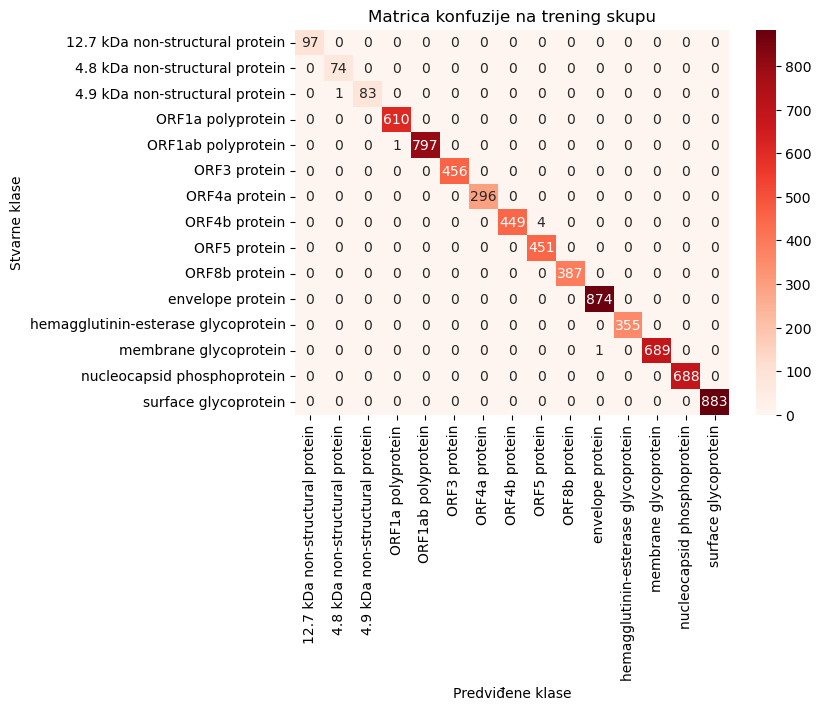

In [85]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [86]:
print(f'Accuracy_test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy_test: 0.998378728923476
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   41   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane gly

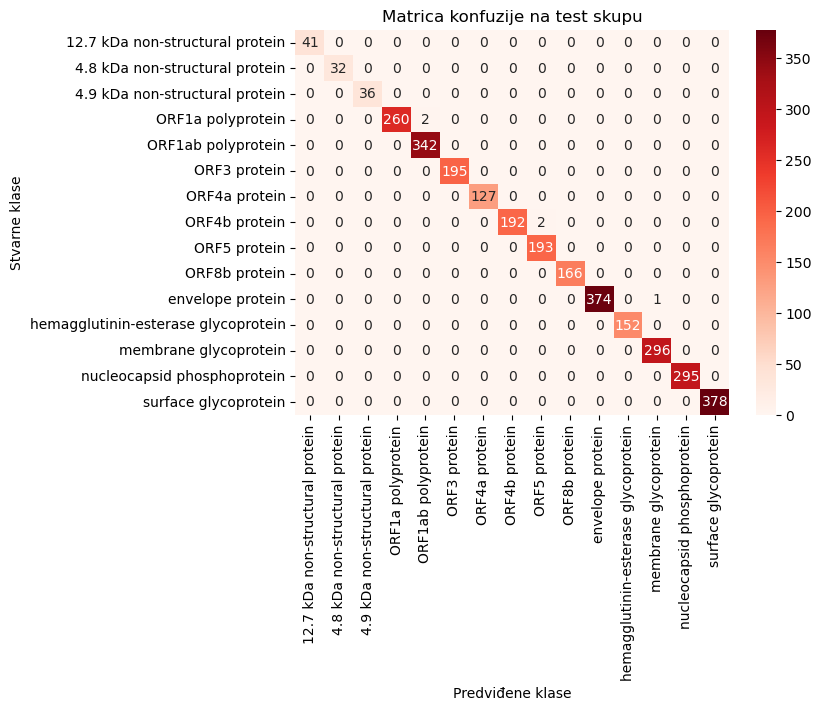

In [87]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()

# Grid search

In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Najbolji parametri:", grid_search.best_params_)

best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Najbolji parametri: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.998378728923476


In [89]:
model = SVC(C= 10, gamma= 'scale', kernel='rbf')
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')

Accuracy train: 0.9991662034463591
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   97   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane g

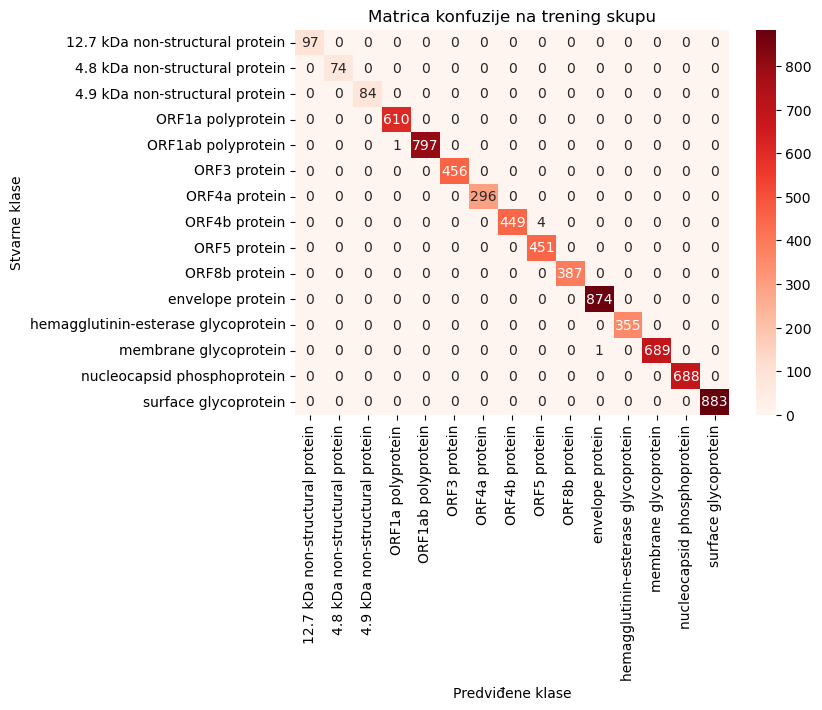

In [90]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [91]:
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.998378728923476
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   41   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane gly

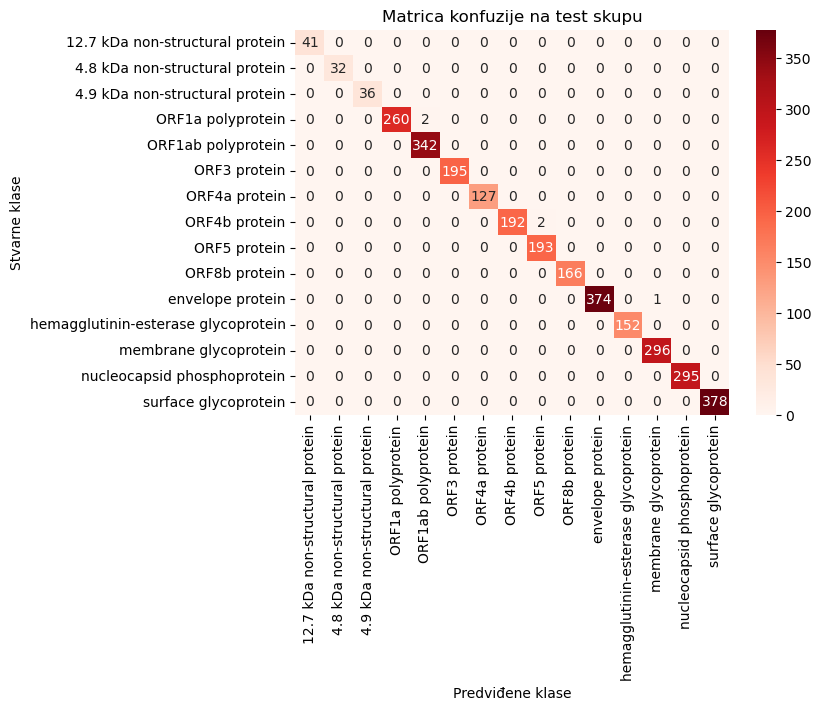

In [92]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()

# Random forest

# Default vrednosti

In [93]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')

Accuracy train: 0.9994441356309061
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   97   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane g

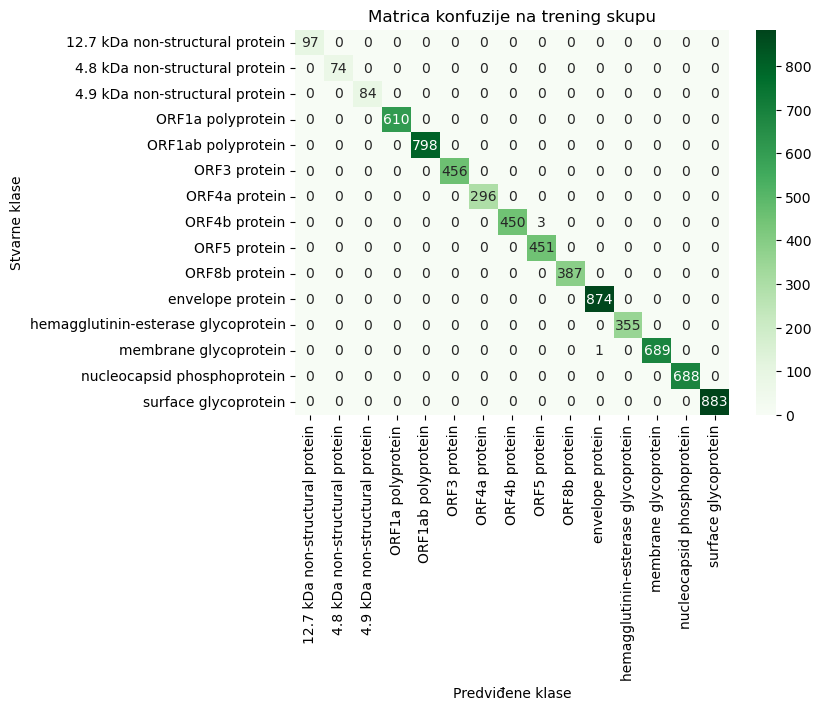

In [94]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [95]:
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.998378728923476
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   41   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane gly

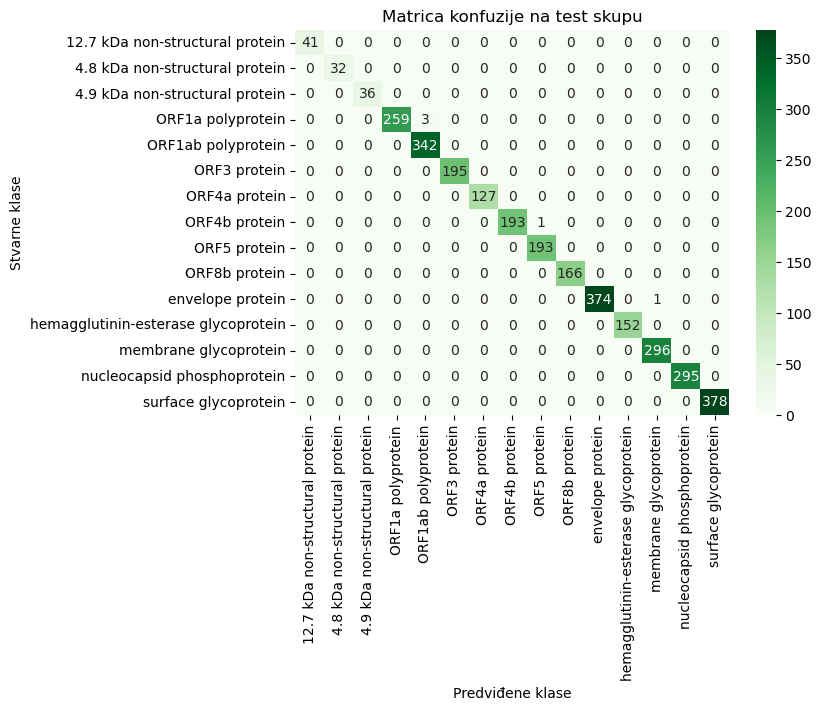

In [96]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()

# Grid search

In [97]:
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Najbolji parametri:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Najbolji parametri: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.998378728923476


In [98]:
model = RandomForestClassifier(max_depth=10, min_samples_leaf= 2, min_samples_split= 5, n_estimators=150)
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')


Accuracy train: 0.9990272373540856
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   97   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane g

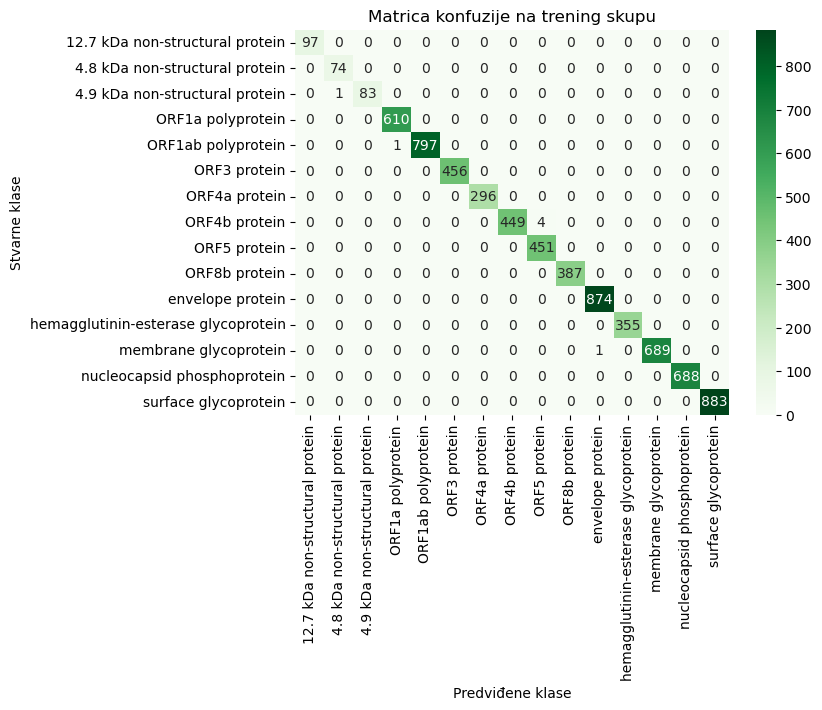

In [99]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [100]:
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.998378728923476
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   41   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane gly

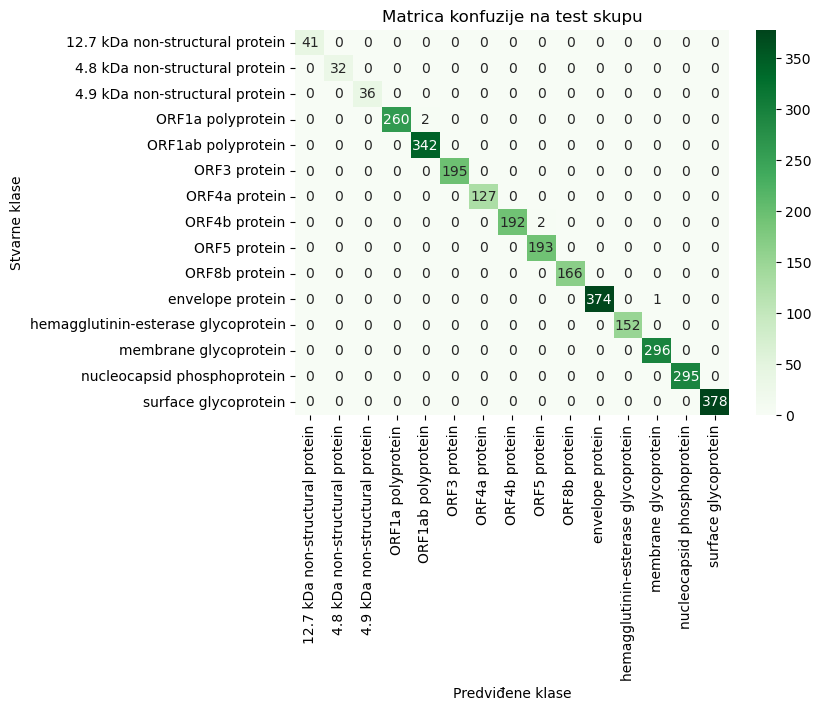

In [101]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()

# Decision tree

## Default vrednosti

In [102]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')

Accuracy train: 0.9994441356309061
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   97   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane g

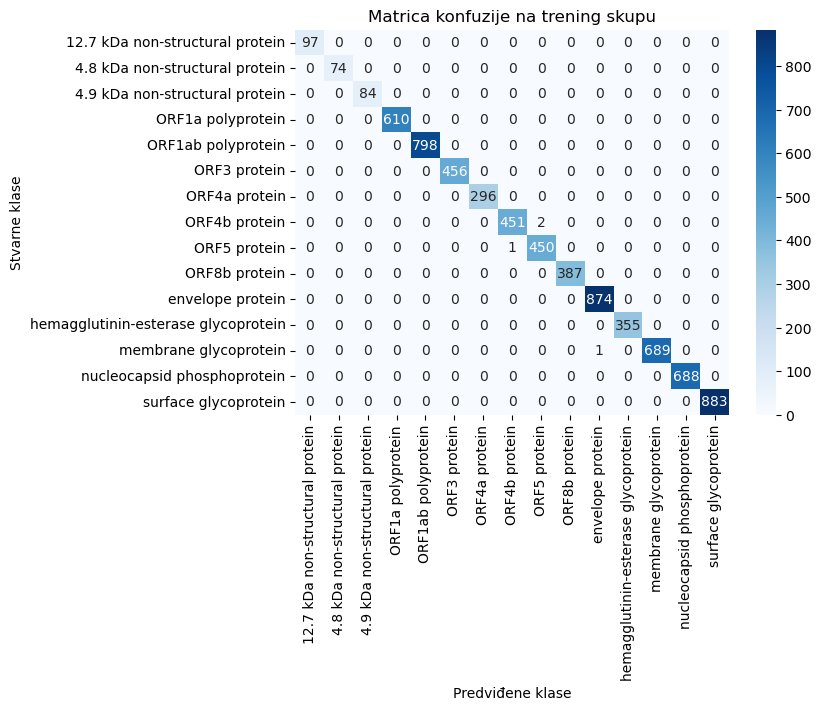

In [103]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [104]:
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.9928664072632944
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   41   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane gl

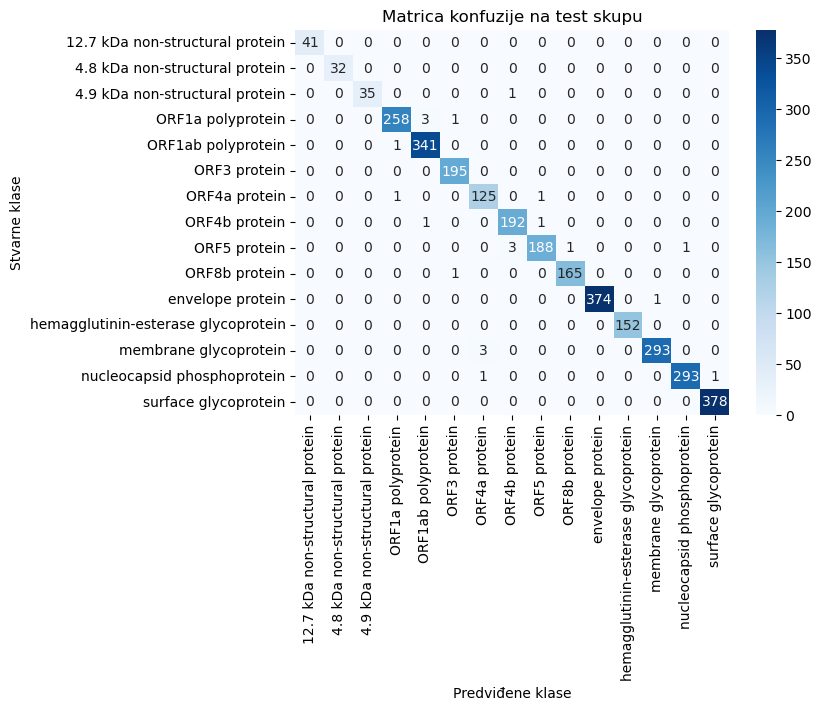

In [105]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()

# Grid search

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

param_grid = {
     'criterion': ['gini', 'entropy',None],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Najbolji parametri:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Najbolji parametri: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9948119325551232


/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: None

  warn

In [107]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth=7, min_samples_leaf= 1, min_samples_split=2)
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')

Accuracy train: 0.9984713729849917
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   97   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  1   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      1   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane g

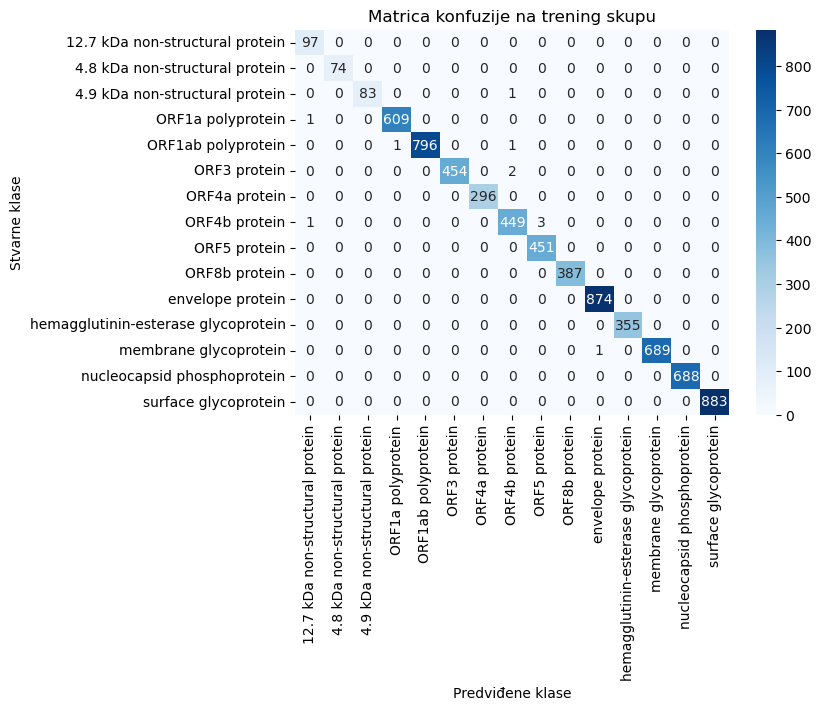

In [108]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [109]:
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.9957846952010376
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   41   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane gl

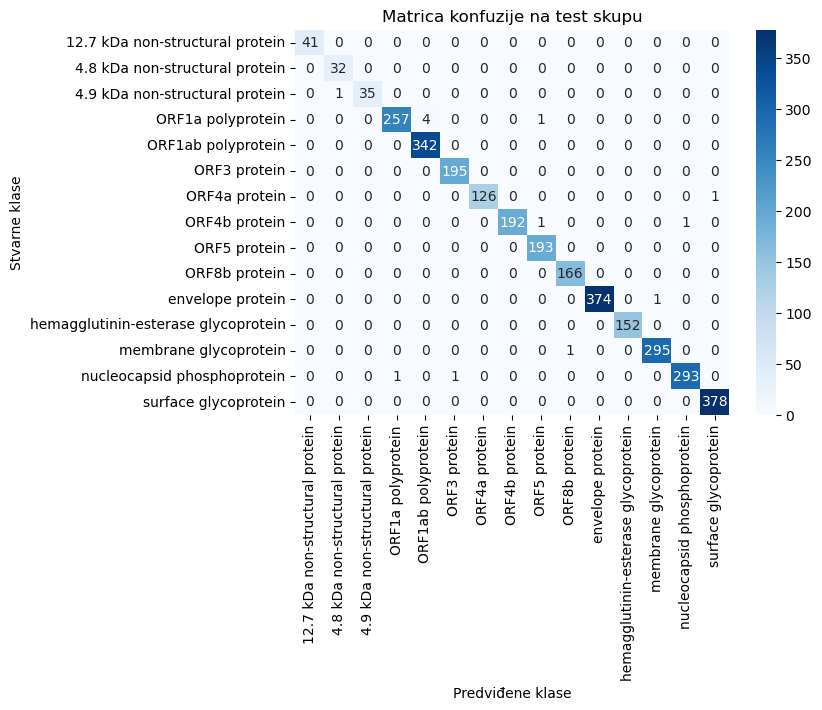

In [110]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()

# KNN

In [111]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')

/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy train: 0.9966648137854364
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   97   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane g

/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


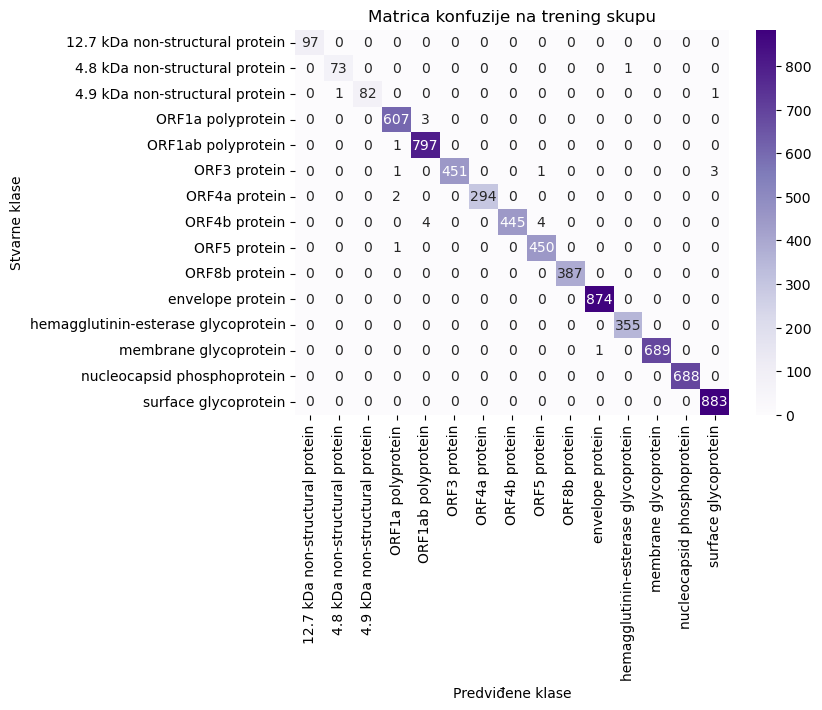

In [112]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [113]:
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.9977302204928664
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   41   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane gl

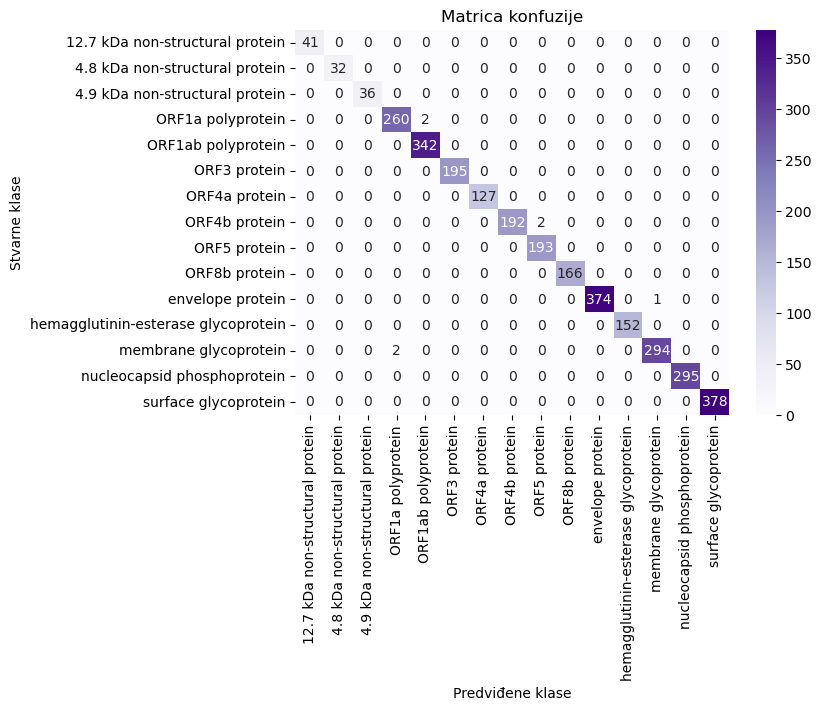

In [114]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije')
plt.show()

# Grid search

In [115]:
knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 za Manhattan, p=2 za Euclidean
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Najbolji parametri:", grid_search.best_params_)

best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

Najbolji parametri: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy: 0.9970817120622568


In [116]:
# Kreiranje i treniranje modela KNN-a sa parametrima koje nam je vratio GridSearch
model =KNeighborsClassifier(n_neighbors= 3, p= 1, weights= 'distance')
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')


Accuracy train: 0.9994441356309061
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   97   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane g

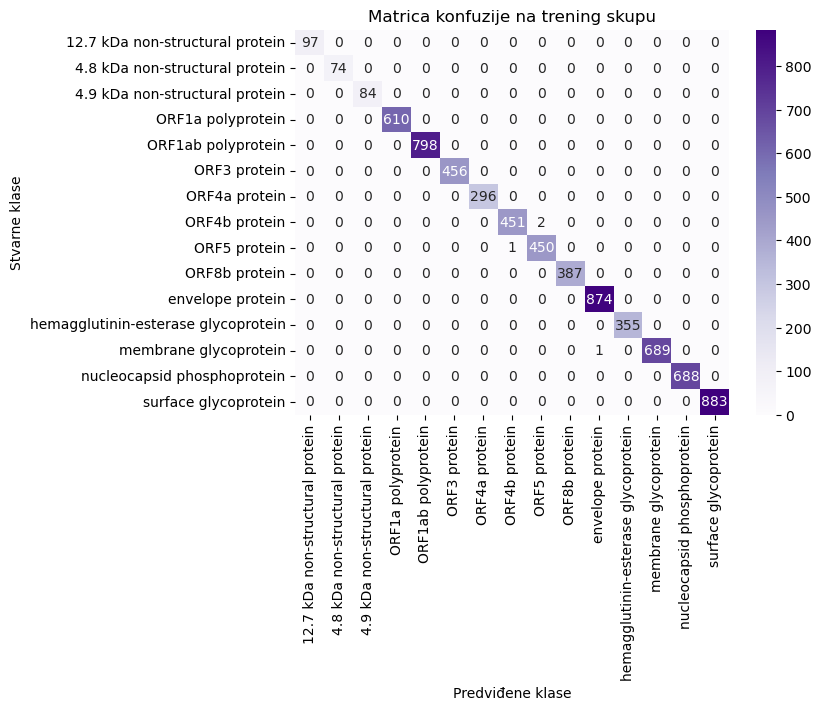

In [117]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [118]:
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.9970817120622568
Matrix confusion:
                                      12.7 kDa non-structural protein  \
12.7 kDa non-structural protein                                   41   
4.8 kDa non-structural protein                                     0   
4.9 kDa non-structural protein                                     0   
ORF1a polyprotein                                                  0   
ORF1ab polyprotein                                                 0   
ORF3 protein                                                       0   
ORF4a protein                                                      0   
ORF4b protein                                                      0   
ORF5 protein                                                       0   
ORF8b protein                                                      0   
envelope protein                                                   0   
hemagglutinin-esterase glycoprotein                                0   
membrane gl

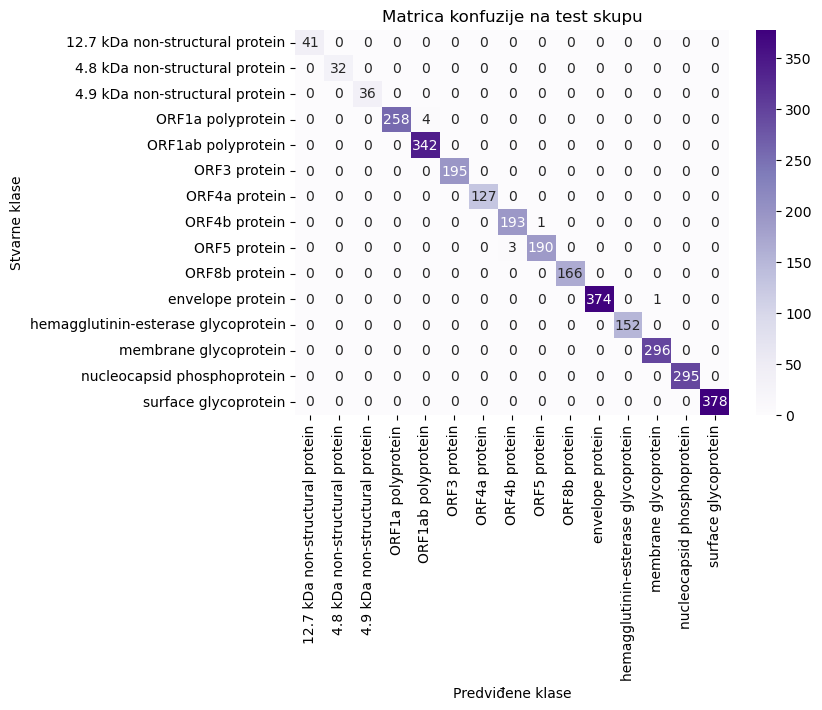

In [119]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()

# Klasifikacija vrste koronavirusa

In [120]:
y_c=spojena_tabela0['Virus'].to_list()
print(len(spojena_tabela0['Virus']))
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y_c)
class_names = label_encoder.classes_
X = spojena_tabela0.drop(spojena_tabela0.columns[:3], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

10280


# Random vrednosti


In [121]:
model = SVC()
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')

Accuracy train: 0.9792940522512507
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    906     0     0     0      0
229E      0   524     0     0      0
BCOV    135     0   921     0      0
MERS      0     0     0  4680      0
SARS1     0     0     0    14     16


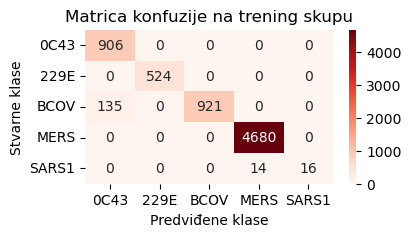

In [122]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [124]:
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.9782749675745784
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    387     0     1     0      0
229E      0   224     0     0      0
BCOV     63     0   390     0      0
MERS      0     0     0  2006      0
SARS1     0     0     0     3     10


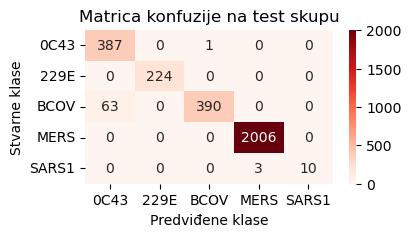

In [125]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()

# Grid search

In [126]:
svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Najbolji parametri:", grid_search.best_params_)

best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Najbolji parametri: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9996757457846952


In [127]:
model = SVC(C= 10, gamma= 'scale', kernel='rbf')
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')

Accuracy train: 1.0
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    906     0     0     0      0
229E      0   524     0     0      0
BCOV      0     0  1056     0      0
MERS      0     0     0  4680      0
SARS1     0     0     0     0     30


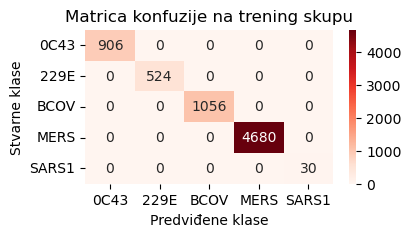

In [128]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [129]:
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.9996757457846952
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    388     0     0     0      0
229E      0   224     0     0      0
BCOV      1     0   452     0      0
MERS      0     0     0  2006      0
SARS1     0     0     0     0     13


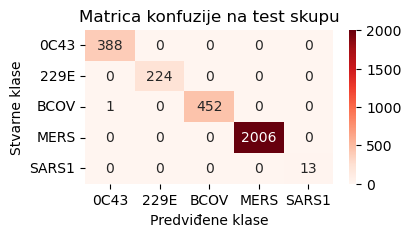

In [130]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()

# Random Forest

# Default vrednosti

In [131]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')

Accuracy train: 1.0
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    906     0     0     0      0
229E      0   524     0     0      0
BCOV      0     0  1056     0      0
MERS      0     0     0  4680      0
SARS1     0     0     0     0     30


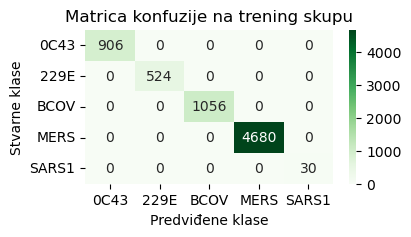

In [132]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [133]:
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.9996757457846952
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    387     0     1     0      0
229E      0   224     0     0      0
BCOV      0     0   453     0      0
MERS      0     0     0  2006      0
SARS1     0     0     0     0     13


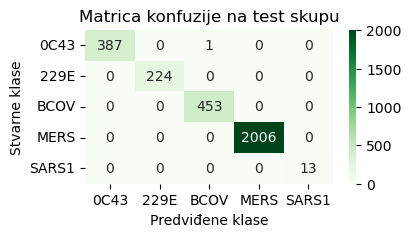

In [134]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()

# Grid search

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Najbolji parametri:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Najbolji parametri: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.9996757457846952


In [136]:
# Kreiranje i treniranje modela Random Forest sa parametrima koje nam je vratio GridSearch
model = RandomForestClassifier(max_depth=None, min_samples_leaf= 1, min_samples_split= 5, n_estimators=100)
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')

Accuracy train: 1.0
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    906     0     0     0      0
229E      0   524     0     0      0
BCOV      0     0  1056     0      0
MERS      0     0     0  4680      0
SARS1     0     0     0     0     30


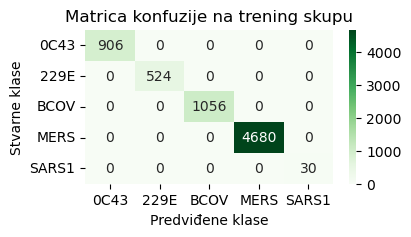

In [137]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [138]:
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.9996757457846952
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    387     0     1     0      0
229E      0   224     0     0      0
BCOV      0     0   453     0      0
MERS      0     0     0  2006      0
SARS1     0     0     0     0     13


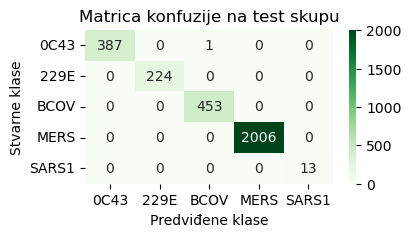

In [139]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()

# Decision tree

# Default vrednosti

In [140]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')

Accuracy train: 1.0
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    906     0     0     0      0
229E      0   524     0     0      0
BCOV      0     0  1056     0      0
MERS      0     0     0  4680      0
SARS1     0     0     0     0     30


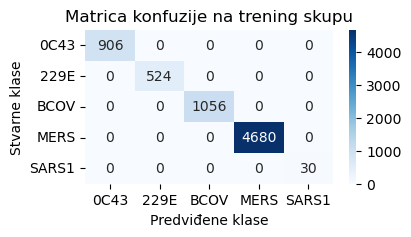

In [141]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [142]:
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.9961089494163424
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    383     0     4     1      0
229E      0   222     0     2      0
BCOV      1     0   452     0      0
MERS      0     1     2  2002      1
SARS1     0     0     0     0     13


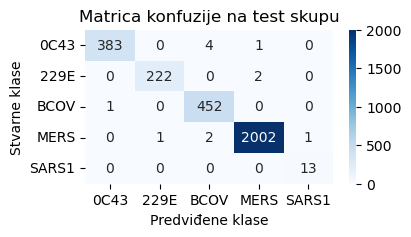

In [143]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()

# Grid search

In [144]:
model = DecisionTreeClassifier()

param_grid = {
     'criterion': ['gini', 'entropy',None],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Najbolji parametri:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Najbolji parametri: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9948119325551232


/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: None

  warn

In [145]:
# Kreiranje i treniranje modela Decision Tree s CART algoritmom
model = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf= 1, min_samples_split= 2)
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')


Accuracy train: 0.9998610339077265
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    906     0     0     0      0
229E      0   524     0     0      0
BCOV      1     0  1055     0      0
MERS      0     0     0  4680      0
SARS1     0     0     0     0     30


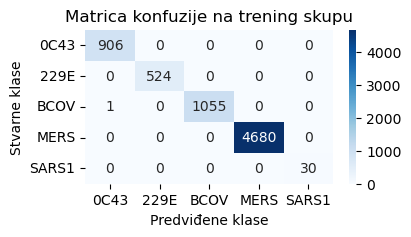

In [146]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [147]:
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.9944876783398184
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    383     0     5     0      0
229E      0   221     1     1      1
BCOV      1     0   450     2      0
MERS      0     1     2  2000      3
SARS1     0     0     0     0     13


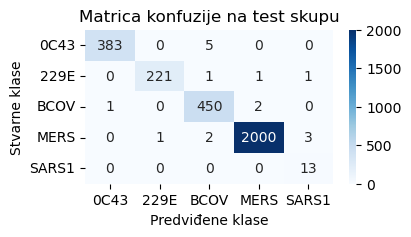

In [148]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()

# KNN

# Default vrednosti

In [149]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')

/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy train: 0.9998610339077265
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    906     0     0     0      0
229E      0   524     0     0      0
BCOV      0     0  1056     0      0
MERS      0     0     0  4679      1
SARS1     0     0     0     0     30


/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


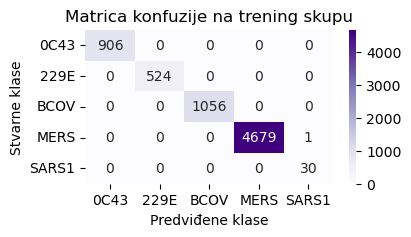

In [150]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [151]:
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.9996757457846952
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    387     0     1     0      0
229E      0   224     0     0      0
BCOV      0     0   453     0      0
MERS      0     0     0  2006      0
SARS1     0     0     0     0     13


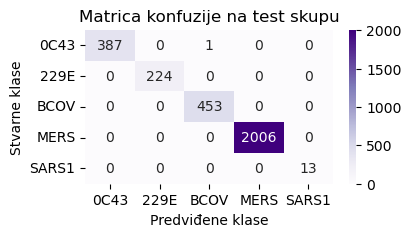

In [152]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()

# Grid search

In [153]:
knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 za Manhattan, p=2 za Euclidean
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Najbolji parametri:", grid_search.best_params_)

best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/mileva/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

Najbolji parametri: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Accuracy: 0.9996757457846952


In [154]:
# Kreiranje i treniranje modela KNN-a sa parametrima koje nam je vratio GridSearch
model =KNeighborsClassifier(n_neighbors= 3, p= 2, weights= 'distance')
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
matrix_train=confusion_matrix(y_train,y_train_pred)
matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Accuracy train: {acc_train}')
confusion_df_train = pd.DataFrame(matrix_train, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_train}')

Accuracy train: 1.0
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    906     0     0     0      0
229E      0   524     0     0      0
BCOV      0     0  1056     0      0
MERS      0     0     0  4680      0
SARS1     0     0     0     0     30


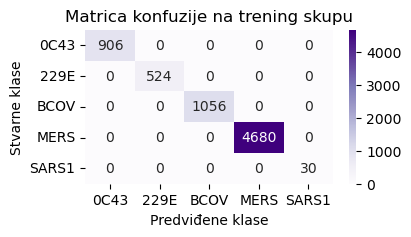

In [155]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_train, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na trening skupu')
plt.show()

In [156]:
# Prikaz rezultata
print(f'Accuracy test: {acc_test}')
confusion_df_test = pd.DataFrame(matrix_test, index=class_names, columns=class_names)
print(f'Matrix confusion:\n {confusion_df_test}')

Accuracy test: 0.9996757457846952
Matrix confusion:
        0C43  229E  BCOV  MERS  SARS1
0C43    387     0     1     0      0
229E      0   224     0     0      0
BCOV      0     0   453     0      0
MERS      0     0     0  2006      0
SARS1     0     0     0     0     13


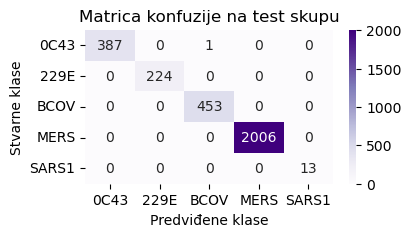

In [157]:
# Vizualizacija matrice konfuzije
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_df_test, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predviđene klase')
plt.ylabel('Stvarne klase')
plt.title('Matrica konfuzije na test skupu')
plt.show()